## Importing all the necassary libraries

In [1]:
import pandas as pd
import numpy as np
import json
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt


pd.reset_option('max_colwidth')

nltk.download('words')  
nltk.download('punkt')  

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Sherow\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sherow\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Data Analysis and Data Cleaning ##

Loading the Dataset from a CSV File

In [2]:
# Load the dataset from a CSV file into the 'df' DataFrame.
df = pd.read_csv(r'c:\YoutubeProject\US_youtube_trending_data.csv')

Displaying Information About the Dataset

In [3]:
# Use df.info() to display details about the DataFrame, including column names and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229588 entries, 0 to 229587
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           229588 non-null  object
 1   title              229588 non-null  object
 2   publishedAt        229588 non-null  object
 3   channelId          229588 non-null  object
 4   channelTitle       229588 non-null  object
 5   categoryId         229588 non-null  int64 
 6   trending_date      229588 non-null  object
 7   tags               229588 non-null  object
 8   view_count         229588 non-null  int64 
 9   likes              229588 non-null  int64 
 10  dislikes           229588 non-null  int64 
 11  comment_count      229588 non-null  int64 
 12  thumbnail_link     229588 non-null  object
 13  comments_disabled  229588 non-null  bool  
 14  ratings_disabled   229588 non-null  bool  
 15  description        225188 non-null  object
dtypes: bool(2), int64(5)

Dropping Unnecessary Columns

In [4]:
# Remove the 'thumbnail_link' column
df.drop('thumbnail_link', axis=1, inplace=True)

# Remove the 'video_id' column
df.drop('video_id', axis=1, inplace=True)

# Remove the 'channelId' column
df.drop('channelId', axis=1, inplace=True)

df = df[(df['dislikes'] != 0) | ((df['dislikes'] == 0) & (df['likes'] == 0))]

df = df[(df['view_count'] != 0)]

df= df[df['tags']!= '[none]']

In [5]:
df_corr=df.drop(['title','publishedAt','channelTitle','trending_date','tags','channelTitle','ratings_disabled','description','publishedAt','trending_date'], axis=1)
corr=df_corr.corr()
corr

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled
categoryId,1.000000,-0.055030,-0.083263,-0.037977,-0.063501,0.084442
view_count,-0.055030,1.000000,0.845533,0.696190,0.531732,0.003933
likes,-0.083263,0.845533,1.000000,0.659794,0.709162,-0.030042
dislikes,-0.037977,0.696190,0.659794,1.000000,0.521833,0.008759
comment_count,-0.063501,0.531732,0.709162,0.521833,1.000000,-0.019139
comments_disabled,0.084442,0.003933,-0.030042,0.008759,-0.019139,1.000000


Loading Video Genres from a JSON File

In [6]:
# Open the JSON file containing category information
with open(r'c:\YoutubeProject\US_category_id.json') as f:
    category_dict = json.load(f)  # Store category names and their numerical IDs

# Replace numerical category IDs with their corresponding category names
df['categoryName'] = df['categoryId'].astype(str).replace(category_dict)

# Drop the 'categoryId' column to retain only the category names
df = df.drop('categoryId', axis=1)

df.head(2)

,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare...",Gaming


In [7]:
df = df.drop_duplicates(subset='title')

Turning tags into a list format

In [8]:
# Defining a function for clean text
def clean_tag(tags):
    return [tag.lower().replace('"', '') for tag in tags.split('|')]

# Applying clean textf function for df
df['tags'] = df['tags'].apply(clean_tag)

df = df[df['tags'].apply(lambda x: '[none]' not in x)]

Tokenize title column and removing stop words

In [9]:
# Function to clean and preprocess a title
def clean_title(title):
    # Convert to lowercase
    title = title.lower()
    
    # Remove special characters, numbers, and punctuation
    title = re.sub(r'[^a-zA-Z\s]', '', title)
    
    # Tokenize the title
    tokens = title.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Rejoin the cleaned tokens
    cleaned_title = ' '.join(tokens)
    
    return cleaned_title

# Apply the clean_title function to the 'title' column
df['cleaned_title'] = df['title'].apply(clean_title)
df.head(2)

,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName,cleaned_title
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,2020-08-12T00:00:00Z,"[brawadis, prank, basketball, skits, ghost, fu...",1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs,asked girlfriend
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,2020-08-12T00:00:00Z,"[apex legends, apex legends characters, new ap...",2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare...",Gaming,apex legends stories outlands endorsement


Creating a Different Dataset Using Only the **Sports**, **People & Blogs** and **Games** Genre

In [10]:
dfSport = df[df['categoryName'] == 'Sports']
dfPpl=df[df['categoryName'] == 'People & Blogs']
dfGame=df[df['categoryName'] == 'Gaming']

dfSport = dfSport.reset_index(drop=True)
dfSport = dfSport[dfSport['dislikes']!=0]
dfSport.head(2)

,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName,cleaned_title
0,Shannon reacts to Kyle Kuzma's game-winning sh...,2020-08-11T16:21:47Z,Skip and Shannon: UNDISPUTED,2020-08-12T00:00:00Z,"[fox, fox sports, fs1, fox sports 1, undispute...",540613,7155,308,1647,False,False,LeBron and the Lakers finally snapped their 3-...,Sports,shannon reacts kyle kuzmas gamewinning shot im...
1,Giannis Gets Ejected After Headbutting Mo Wagner,2020-08-12T02:30:32Z,Bleacher Report,2020-08-12T00:00:00Z,"[bleacher report, br, nba, giannis, giannis an...",756814,8278,331,2441,False,False,"In a random and wild sequence of events, Giann...",Sports,giannis gets ejected headbutting mo wagner


## Exploring the Relationship Between Video Popularity and Tags

**Dropping unecessary columns**

In [11]:
dfSport=dfSport.drop(['comment_count', 'ratings_disabled','description','publishedAt','trending_date','comments_disabled','cleaned_title'], axis=1)

dfPpl=dfPpl.drop(['comment_count', 'ratings_disabled','description','publishedAt','trending_date','comments_disabled','cleaned_title'], axis=1)

dfGame=dfGame.drop(['comment_count', 'ratings_disabled','description','publishedAt','trending_date','comments_disabled','cleaned_title'], axis=1)

dfSport.head(2)

,title,channelTitle,tags,view_count,likes,dislikes,categoryName
0,Shannon reacts to Kyle Kuzma's game-winning sh...,Skip and Shannon: UNDISPUTED,"[fox, fox sports, fs1, fox sports 1, undispute...",540613,7155,308,Sports
1,Giannis Gets Ejected After Headbutting Mo Wagner,Bleacher Report,"[bleacher report, br, nba, giannis, giannis an...",756814,8278,331,Sports


In [12]:
dfSport['LikesDislikeSum']=dfSport['likes'] + dfSport['dislikes']

dfGame['LikesDislikeSum']=dfGame['likes'] + dfGame['dislikes'] 

dfPpl['LikesDislikeSum']=dfPpl['likes'] + dfPpl['dislikes']

**Extracting tags into a dataframe**

For **dfSports** Dataframe

In [13]:
# Flatten the list of lists in the 'tags' column into a single list of tags
all_tags = [tag for tags in dfSport['tags'] for tag in tags]

# Count the frequency of each tag
tag_frequencies = Counter(all_tags)

# Create a DataFrame to store the tag names and their frequencies
tag_frequencies_df = pd.DataFrame(tag_frequencies.items(), columns=['Tag', 'Frequency'])

# Sort the DataFrame by frequency in descending order
tag_frequencies_df = tag_frequencies_df.sort_values(by='Frequency', ascending=False)

# Reset the index of the DataFrame
tag_frequencies_df = tag_frequencies_df.reset_index(drop=True)
tag_frequencies_df

,Tag,Frequency
0,highlights,455
1,football,451
2,nba,400
3,basketball,295
4,sports,268
...,...,...
14006,tiger woods responsive,1
14007,us-sport,1
14008,woods accident,1
14009,woods crash,1


For **dfPpl** Dataframe

In [14]:
# Flatten the list of lists in the 'tags' column into a single list of tags
all_tags_P = [tag for tags in dfPpl['tags'] for tag in tags]

# Count the frequency of each tag
tag_frequencies_P = Counter(all_tags_P)

# Create a DataFrame to store the tag names and their frequencies
tag_frequencies_df_P = pd.DataFrame(tag_frequencies_P.items(), columns=['Tag', 'Frequency'])

# Sort the DataFrame by frequency in descending order
tag_frequencies_df_P = tag_frequencies_df_P.sort_values(by='Frequency', ascending=False)

# Reset the index of the DataFrame
tag_frequencies_df_P = tag_frequencies_df_P.reset_index(drop=True)
tag_frequencies_df_P

,Tag,Frequency
0,funny,178
1,vlog,139
2,comedy,111
3,family,91
4,tiktok,87
...,...,...
9224,speaking only spanish,1
9225,surprising people with perfect chinese,1
9226,surprising people by speaking chinese,1
9227,xiaomanyc,1


For **dfGame** Dataframe

In [15]:
# Flatten the list of lists in the 'tags' column into a single list of tags
all_tags_G = [tag for tags in dfGame['tags'] for tag in tags]

# Count the frequency of each tag
tag_frequencies_G = Counter(all_tags_G)

# Create a DataFrame to store the tag names and their frequencies
tag_frequencies_df_G = pd.DataFrame(tag_frequencies_G.items(), columns=['Tag', 'Frequency'])

# Sort the DataFrame by frequency in descending order
tag_frequencies_df_G = tag_frequencies_df_G.sort_values(by='Frequency', ascending=False)

# Reset the index of the DataFrame
tag_frequencies_df_G = tag_frequencies_df_G.reset_index(drop=True)
tag_frequencies_df_G

,Tag,Frequency
0,minecraft,713
1,fortnite,266
2,challenge,259
3,gaming,248
4,funny,235
...,...,...
19196,nintendo switch playing online,1
19197,online update,1
19198,breeze,1
19199,breeze valorant,1


**Top 10% Most Used Words with Stop Words Removed and 1 Values Removed**

Sports

In [16]:
# Calculate the total number of unique tags
total_unique_tags = len(tag_frequencies_df)

# Calculate the top 10% threshold
top_10_percent_threshold = int(total_unique_tags * 0.10)

# Filter the tags to get the top 10% most frequent tags
top_10_percent_tags = tag_frequencies_df.head(top_10_percent_threshold)

# Remove tags with a frequency of 1
top_10_percent_tags = top_10_percent_tags[top_10_percent_tags['Frequency'] != 1]

# Reset the index of the DataFrame
top_10_percent_tags = top_10_percent_tags.reset_index(drop=True)
top_10_percent_tags

,Tag,Frequency
0,highlights,455
1,football,451
2,nba,400
3,basketball,295
4,sports,268
...,...,...
1396,media,5
1397,jj redick podcast,5
1398,#badminton,5
1399,#bwf,5


People & Blogs

In [17]:
# Calculate the total number of unique tags
total_unique_tags_P = len(tag_frequencies_df_P)

# Calculate the top 10% threshold
top_10_percent_threshold_P = int(total_unique_tags_P * 0.10)

# Filter the tags to get the top 10% most frequent tags
top_10_percent_tags_P = tag_frequencies_df_P.head(top_10_percent_threshold_P)

# Remove tags with a frequency of 1
top_10_percent_tags_P = top_10_percent_tags_P[top_10_percent_tags_P['Frequency'] != 1]

# Reset the index of the DataFrame
top_10_percent_tags_P = top_10_percent_tags_P.reset_index(drop=True)
top_10_percent_tags_P

,Tag,Frequency
0,funny,178
1,vlog,139
2,comedy,111
3,family,91
4,tiktok,87
...,...,...
917,zoella,4
918,i moved,4
919,orlando,4
920,pl-unsolved,4


Games

In [18]:
# Calculate the total number of unique tags
total_unique_tags_G = len(tag_frequencies_df_G)

# Calculate the top 10% threshold
top_10_percent_threshold_G = int(total_unique_tags_G * 0.10)

# Filter the tags to get the top 10% most frequent tags
top_10_percent_tags_G = tag_frequencies_df_G.head(top_10_percent_threshold_G)

# Remove tags with a frequency of 1
top_10_percent_tags_G = top_10_percent_tags_G[top_10_percent_tags_G['Frequency'] != 1]

# Reset the index of the DataFrame
top_10_percent_tags_G = top_10_percent_tags_G.reset_index(drop=True)
top_10_percent_tags_G

,Tag,Frequency
0,minecraft,713
1,fortnite,266
2,challenge,259
3,gaming,248
4,funny,235
...,...,...
1915,among us animation mini crewmate,4
1916,apex legends trailer,4
1917,minecraft mega base,4
1918,fortnite funny fails,4


**Identifying the Presence of Top 10%**

Sports

In [19]:
# Extract the tags from the 'Tag' column of the top_10_percent_tags DataFrame
top_10_percent_words = top_10_percent_tags['Tag'].tolist()

# Create a set of the top 10% most used words
top_10_percent_words_set = set(top_10_percent_words)

# Function to check if any word from the top 10% is present in the tags list
def contains_top_words(tags):
    for tag in tags:
        if tag in top_10_percent_words_set:
            return 'Used'
    return 'Not Used'

# Apply the function to the 'tags' column of the dfSport DataFrame
dfSport['TagUsage'] = dfSport['tags'].apply(contains_top_words)

People & Blogs

In [20]:
# Extract the tags from the 'Tag' column of the top_10_percent_tags DataFrame
top_10_percent_words_P = top_10_percent_tags_P['Tag'].tolist()

# Create a set of the top 10% most used words
top_10_percent_words_set_P = set(top_10_percent_words_P)

# Function to check if any word from the top 10% is present in the tags list
def contains_top_words(tags):
    for tag in tags:
        if tag in top_10_percent_words_set_P:
            return 'Used'
    return 'Not Used'

# Apply the function to the 'tags' column of the dfSport DataFrame
dfPpl['TagUsage'] = dfPpl['tags'].apply(contains_top_words)

Games

In [21]:
# Extract the tags from the 'Tag' column of the top_10_percent_tags DataFrame
top_10_percent_words_G = top_10_percent_tags_G['Tag'].tolist()

# Create a set of the top 10% most used words
top_10_percent_words_set_G = set(top_10_percent_words_G)

# Function to check if any word from the top 10% is present in the tags list
def contains_top_words(tags):
    for tag in tags:
        if tag in top_10_percent_words_set_G:
            return 'Used'
    return 'Not Used'

# Apply the function to the 'tags' column of the dfSport DataFrame
dfGame['TagUsage'] = dfGame['tags'].apply(contains_top_words)

**Counting the Presence of the top 10% Most Used Tages**

Sports

In [22]:
def count_top_tags(tags):
    count = 0
    for tag in tags:
        if tag in top_10_percent_tags['Tag'].values:
            count += 1
    return count
dfSport['top_10_percent_count'] = dfSport['tags'].apply(count_top_tags)
dfSport.head(2)

,title,channelTitle,tags,view_count,likes,dislikes,categoryName,LikesDislikeSum,TagUsage,top_10_percent_count
0,Shannon reacts to Kyle Kuzma's game-winning sh...,Skip and Shannon: UNDISPUTED,"[fox, fox sports, fs1, fox sports 1, undispute...",540613,7155,308,Sports,7463,Used,31
1,Giannis Gets Ejected After Headbutting Mo Wagner,Bleacher Report,"[bleacher report, br, nba, giannis, giannis an...",756814,8278,331,Sports,8609,Used,7


People & Blogs

In [23]:
def count_top_tags(tags):
    count = 0
    for tag in tags:
        if tag in top_10_percent_tags_P['Tag'].values:
            count += 1
    return count
dfPpl['top_10_percent_count'] = dfPpl['tags'].apply(count_top_tags)
dfPpl.head(2)

,title,channelTitle,tags,view_count,likes,dislikes,categoryName,LikesDislikeSum,TagUsage,top_10_percent_count
0,I ASKED HER TO BE MY GIRLFRIEND...,Brawadis,"[brawadis, prank, basketball, skits, ghost, fu...",1514614,156908,5855,People & Blogs,162763,Used,15
11,Try Not To Laugh Challenge #51,Smosh Pit,"[smosh, smosh pit, smosh games, funny, comedy]",591837,44168,409,People & Blogs,44577,Used,5


Games

In [24]:
def count_top_tags(tags):
    count = 0
    for tag in tags:
        if tag in top_10_percent_tags_G['Tag'].values:
            count += 1
    return count
dfGame['top_10_percent_count'] = dfGame['tags'].apply(count_top_tags)
dfGame.head(2)

,title,channelTitle,tags,view_count,likes,dislikes,categoryName,LikesDislikeSum,TagUsage,top_10_percent_count
1,Apex Legends | Stories from the Outlands – “Th...,Apex Legends,"[apex legends, apex legends characters, new ap...",2381688,146739,2794,Gaming,149533,Used,24
12,Rainbow Six Siege: Operation Shadow Legacy Rev...,Ubisoft North America,"[r6, r6s, siege, new siege, new operators, new...",320872,14288,774,Gaming,15062,Used,8


**Creating graphs Displaying the top 10% tags' involvement**

Sports

C:\Users\Sherow\AppData\Local\Temp\ipykernel_12008\3698850900.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v, f'{tag_usage_percentages[i]:.2f}%', ha='center', va='bottom')


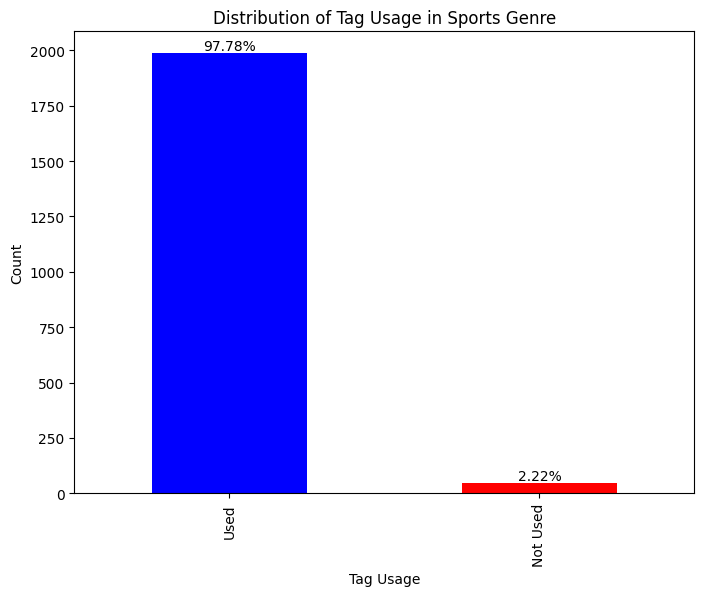

In [25]:

tag_usage_counts = dfSport['TagUsage'].value_counts()


tag_usage_percentages = tag_usage_counts / tag_usage_counts.sum() * 100


custom_colors = ['blue', 'red']

plt.figure(figsize=(8, 6))
ax = tag_usage_counts.plot(kind='bar', color=custom_colors)
plt.title('Distribution of Tag Usage in Sports Genre')
plt.xlabel('Tag Usage')
plt.ylabel('Count')

for i, v in enumerate(tag_usage_counts):
    ax.text(i, v, f'{tag_usage_percentages[i]:.2f}%', ha='center', va='bottom')

# Show the chart
plt.show()

People & Blogs

C:\Users\Sherow\AppData\Local\Temp\ipykernel_12008\1907989056.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v, f'{tag_usage_percentages[i]:.2f}%', ha='center', va='bottom')


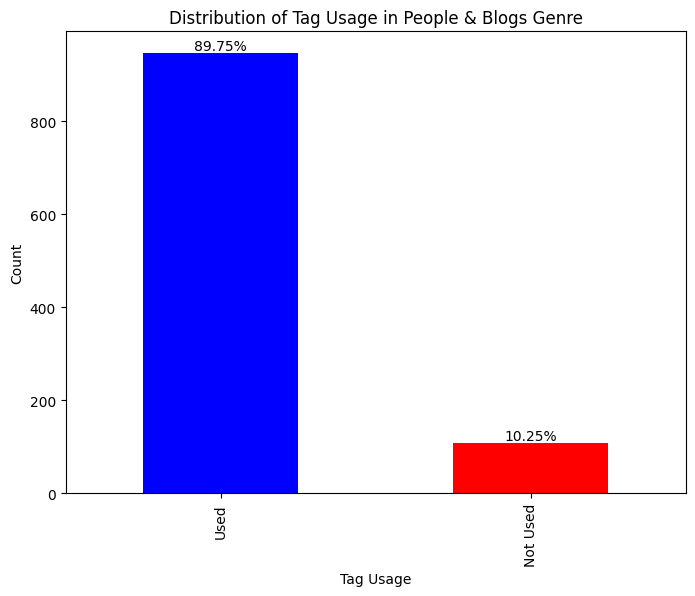

In [26]:
# Count the frequencies of each unique value in the 'TagUsage' column
tag_usage_counts = dfPpl['TagUsage'].value_counts()

# Calculate the percentage for each 'TagUsage' category
tag_usage_percentages = tag_usage_counts / tag_usage_counts.sum() * 100

# Define custom colors for each 'TagUsage'
custom_colors = ['blue', 'red']

# Create a bar chart with custom colors and annotations for percentages
plt.figure(figsize=(8, 6))
ax = tag_usage_counts.plot(kind='bar', color=custom_colors)
plt.title('Distribution of Tag Usage in People & Blogs Genre')
plt.xlabel('Tag Usage')
plt.ylabel('Count')

# Annotate the bars with percentages
for i, v in enumerate(tag_usage_counts):
    ax.text(i, v, f'{tag_usage_percentages[i]:.2f}%', ha='center', va='bottom')

# Show the chart
plt.show()

Games

C:\Users\Sherow\AppData\Local\Temp\ipykernel_12008\2306383655.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v, f'{tag_usage_percentages[i]:.2f}%', ha='center', va='bottom')


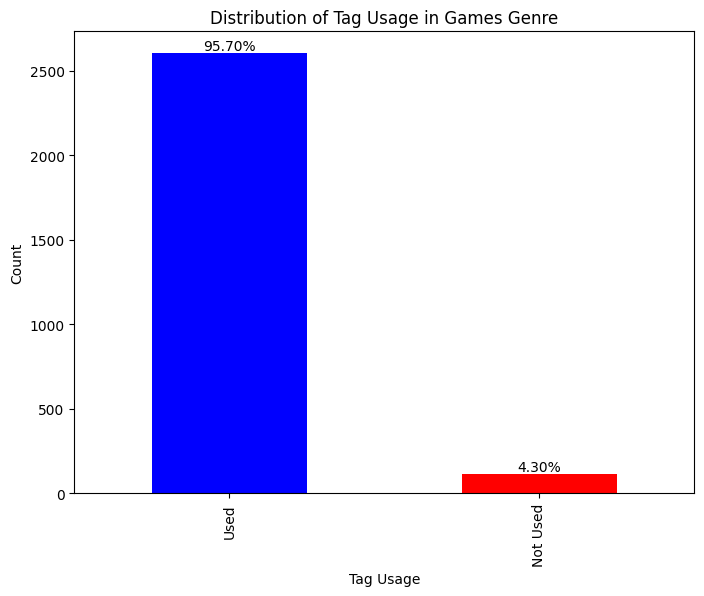

In [27]:
# Count the frequencies of each unique value in the 'TagUsage' column
tag_usage_counts = dfGame['TagUsage'].value_counts()

# Calculate the percentage for each 'TagUsage' category
tag_usage_percentages = tag_usage_counts / tag_usage_counts.sum() * 100

# Define custom colors for each 'TagUsage'
custom_colors = ['blue', 'red']

# Create a bar chart with custom colors and annotations for percentages
plt.figure(figsize=(8, 6))
ax = tag_usage_counts.plot(kind='bar', color=custom_colors)
plt.title('Distribution of Tag Usage in Games Genre')
plt.xlabel('Tag Usage')
plt.ylabel('Count')

# Annotate the bars with percentages
for i, v in enumerate(tag_usage_counts):
    ax.text(i, v, f'{tag_usage_percentages[i]:.2f}%', ha='center', va='bottom')

# Show the chart
plt.show()

**Finding the correlation between tags and views, likes, dislikes**

Sports

In [28]:
filtered_df = dfSport[(dfSport['top_10_percent_count'] != 0)]

correlation_view = filtered_df['view_count'].corr(filtered_df['top_10_percent_count'])
correlation_like = filtered_df['top_10_percent_count'].corr(filtered_df['likes'])
correlation_dislike = filtered_df['top_10_percent_count'].corr(filtered_df['dislikes'])

print(f"Correlation between 'top_10_percent_count' and 'view_count': {correlation_view:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'likes': {correlation_like:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'dislikes': {correlation_dislike:.2f}")

Correlation between 'top_10_percent_count' and 'view_count': 0.19
Correlation between 'top_10_percent_count' and 'likes': 0.21
Correlation between 'top_10_percent_count' and 'dislikes': 0.12


Games

In [29]:
filtered_df = dfGame[(dfGame['top_10_percent_count'] != 0)]

correlation_view = filtered_df['view_count'].corr(filtered_df['top_10_percent_count'])
correlation_like = filtered_df['top_10_percent_count'].corr(filtered_df['likes'])
correlation_dislike = filtered_df['top_10_percent_count'].corr(filtered_df['dislikes'])

print(f"Correlation between 'top_10_percent_count' and 'view_count': {correlation_view:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'likes': {correlation_like:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'dislikes': {correlation_dislike:.2f}")

Correlation between 'top_10_percent_count' and 'view_count': 0.09
Correlation between 'top_10_percent_count' and 'likes': 0.10
Correlation between 'top_10_percent_count' and 'dislikes': 0.05


People & Blogs

In [30]:
filtered_df = dfPpl[(dfPpl['top_10_percent_count'] != 0)]

correlation_view = filtered_df['view_count'].corr(filtered_df['top_10_percent_count'])
correlation_like = filtered_df['top_10_percent_count'].corr(filtered_df['likes'])
correlation_dislike = filtered_df['top_10_percent_count'].corr(filtered_df['dislikes'])

print(f"Correlation between 'top_10_percent_count' and 'view_count': {correlation_view:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'likes': {correlation_like:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'dislikes': {correlation_dislike:.2f}")

Correlation between 'top_10_percent_count' and 'view_count': 0.12
Correlation between 'top_10_percent_count' and 'likes': 0.13
Correlation between 'top_10_percent_count' and 'dislikes': -0.01


In [31]:
## Corelation between Tags and reaction (Likes and Dislikes)
correlation_GameTagLikeDislike = dfGame['top_10_percent_count'].corr(dfGame['LikesDislikeSum'])

correlation_SportTagLikeDislike = dfSport['top_10_percent_count'].corr(dfSport['LikesDislikeSum'])

correlation_PeopleTagLikeDislike = dfPpl['top_10_percent_count'].corr(dfPpl['LikesDislikeSum'])

# Display the correlations
print(f"Correlation between 'top_10_percent_count' and 'LikesDislikeSum	': {correlation_GameTagLikeDislike:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'LikesDislikeSum	': {correlation_SportTagLikeDislike:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'LikesDislikeSum	': {correlation_PeopleTagLikeDislike:.2f}")


Correlation between 'top_10_percent_count' and 'LikesDislikeSum	': 0.10
Correlation between 'top_10_percent_count' and 'LikesDislikeSum	': 0.21
Correlation between 'top_10_percent_count' and 'LikesDislikeSum	': 0.12


Since there is no deep correlation between the videos' tags and the views likes and dislikes, the videos' success is **not** dependent by this research

## Exploring Relationship in Videos by the Video Title ##

**Finding the Correlation Between Video Title Lenght and View Count**

In [32]:
# Add a new column for title length
df['title_length'] = df['title'].apply(len)

# Calculate the correlation between title length and view count
correlation = df['title_length'].corr(df['view_count'])

# Print the correlation value
print(f"Correlation between Title Length and View Count: {correlation:.2f}")

Correlation between Title Length and View Count: -0.05


There is **no** correlation

**Resetting All Dataframes**

In [33]:
dfSport = df[df['categoryName'] == 'Sports']

dfSport=dfSport.drop(['comment_count', 'ratings_disabled','description','publishedAt','trending_date','comments_disabled','tags'], axis=1)

dfSport.head(2)

,title,channelTitle,view_count,likes,dislikes,categoryName,cleaned_title,title_length
40,Shannon reacts to Kyle Kuzma's game-winning sh...,Skip and Shannon: UNDISPUTED,540613,7155,308,Sports,shannon reacts kyle kuzmas gamewinning shot im...,100
43,Giannis Gets Ejected After Headbutting Mo Wagner,Bleacher Report,756814,8278,331,Sports,giannis gets ejected headbutting mo wagner,48


**Counting All Words From The Cleaned Title Colum**

In [34]:
dfSport['LikesDislikeSum']=dfSport['likes'] + dfSport['dislikes']

In [35]:
column_list = dfSport['cleaned_title'].tolist()

column_list = [string.split() for string in column_list]

flat_list = [word for sublist in column_list for word in sublist]

word_counts = Counter(flat_list)


**Creating Dataframes Showing the Frequency of Words**

In [36]:
# Create a DataFrame to store the tag names and their frequencies
title_frequencies_df = pd.DataFrame(word_counts.items(), columns=['Title', 'Frequency'])

# Sort the DataFrame by frequency in descending order
title_frequencies_df = title_frequencies_df.sort_values(by='Frequency', ascending=False)

# Reset the index of the DataFrame
title_frequencies_df = title_frequencies_df.reset_index(drop=True)
title_frequencies_df

,Title,Frequency
0,highlights,777
1,vs,586
2,game,261
3,full,218
4,sports,191
...,...,...
3889,lightning,1
3890,airbnb,1
3891,workshop,1
3892,raise,1


**Determining the top 10% Most Frequent Title Words and Getting Rid of Frequencies of 1**

In [37]:
# Calculate the total number of unique tags
total_unique_title = len(title_frequencies_df)

# Calculate the top 10% threshold
top_10_percent = int(total_unique_title * 0.10)

# Filter the tags to get the top 10% most frequent tags
top_10_percent_titles = title_frequencies_df.head(top_10_percent)

# Remove tags with a frequency of 1
top_10_percent_titles = top_10_percent_titles[top_10_percent_titles['Frequency'] != 1]

# Reset the index of the DataFrame
top_10_percent_titles = top_10_percent_titles.reset_index(drop=True)
top_10_percent_titles

,Title,Frequency
0,highlights,777
1,vs,586
2,game,261
3,full,218
4,sports,191
...,...,...
384,back,8
385,penalties,8
386,go,8
387,epic,8


**Determining if a Top 10% Word Has Been Used**

In [38]:
# Create a set of the top 10% most frequent words
top_10_percent_words_set = set(top_10_percent_titles['Title'])

# Function to check if any word from the top 10% is present in the cleaned titles
def contains_top_words(title):
    title = title.lower()  
    words = title.split()
    for word in words:
        if word in top_10_percent_words_set:
            return 'Used'
    return 'Not Used'

# Apply the function to the 'cleaned_title' column of the DataFrame
dfSport['top_words_usage'] = dfSport['cleaned_title'].apply(contains_top_words)

# Count the occurrences of "Used" and "Not Used" in the 'top_words_usage' column
usage_counts = dfSport['top_words_usage'].value_counts()

# Display the counts
print(usage_counts)

top_words_usage
Used        2004
Not Used      64
Name: count, dtype: int64


**Counting the Frequencies Used of the Top 10%**

In [39]:
def count_top_words(title):
    count = 0
    words = title.split()
    for word in words:
        if word in top_10_percent_titles['Title'].values:
            count += 1
    return count

dfSport['top_10_percent_count'] = dfSport['cleaned_title'].apply(count_top_words)
dfSport.head(4)

,title,channelTitle,view_count,likes,dislikes,categoryName,cleaned_title,title_length,LikesDislikeSum,top_words_usage,top_10_percent_count
40,Shannon reacts to Kyle Kuzma's game-winning sh...,Skip and Shannon: UNDISPUTED,540613,7155,308,Sports,shannon reacts kyle kuzmas gamewinning shot im...,100,7463,Used,7
43,Giannis Gets Ejected After Headbutting Mo Wagner,Bleacher Report,756814,8278,331,Sports,giannis gets ejected headbutting mo wagner,48,8609,Used,2
47,TRAIL BLAZERS at MAVERICKS | FULL GAME HIGHLIG...,NBA,937569,10160,405,Sports,trail blazers mavericks full game highlights a...,67,10565,Used,7
65,'Don't mess with Dame Dolla' - Stephen A. reac...,ESPN,791489,13242,325,Sports,dont mess dame dolla stephen reacts lillards b...,96,13567,Used,6


**Creating a Graph to See Theq Frequency of Words**

C:\Users\Sherow\AppData\Local\Temp\ipykernel_12008\2403054752.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v, f'{top_words_usage_percentages[i]:.2f}%', ha='center', va='bottom')


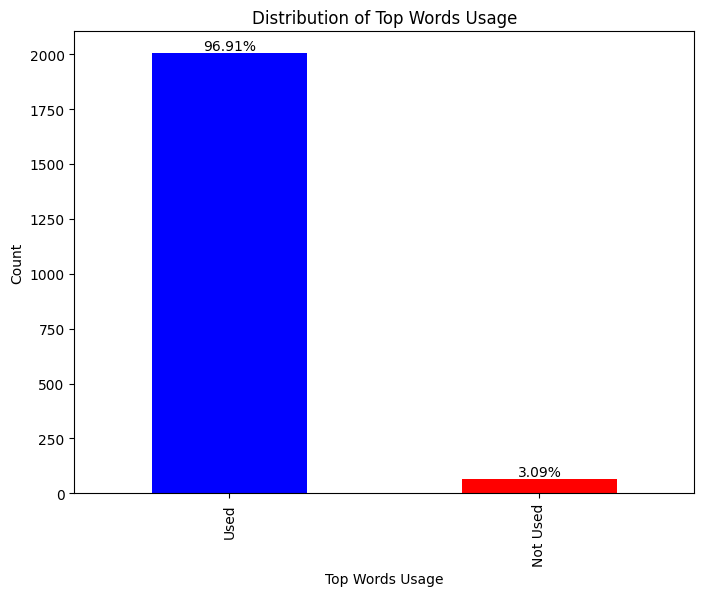

In [40]:
# Calculate the frequencies of 'top_words_usage' values
top_words_usage_counts = dfSport['top_words_usage'].value_counts()

# Calculate the percentage for each 'top_words_usage' category
top_words_usage_percentages = top_words_usage_counts / top_words_usage_counts.sum() * 100

# Define custom colors for the bars
custom_colors = ['blue', 'red']

# Create a bar chart with custom colors and annotations for percentages
plt.figure(figsize=(8, 6))
ax = top_words_usage_counts.plot(kind='bar', color=custom_colors)
plt.title('Distribution of Top Words Usage')
plt.xlabel('Top Words Usage')
plt.ylabel('Count')

# Annotate the bars with percentages
for i, v in enumerate(top_words_usage_counts):
    ax.text(i, v, f'{top_words_usage_percentages[i]:.2f}%', ha='center', va='bottom')

# Show the chart
plt.show()

**Finding the Correlation Between the Top 10% Most Frequent Words and Views, Likes, Dislikes**

In [41]:


correlation_view = dfSport['top_10_percent_count'].corr(dfSport['view_count'])
correlation_likes = dfSport['top_10_percent_count'].corr(dfSport['likes'])
correlation_dislikes = dfSport['top_10_percent_count'].corr(dfSport['dislikes'])
correlation_length = dfSport['title_length'].corr(dfSport['dislikes'])

# Display the correlations
print(f"Correlation between 'top_10_percent_count' and 'view_count': {correlation_view:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'likes': {correlation_likes:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'dislikes': {correlation_dislikes:.2f}")


Correlation between 'top_10_percent_count' and 'view_count': -0.01
Correlation between 'top_10_percent_count' and 'likes': -0.20
Correlation between 'top_10_percent_count' and 'dislikes': -0.01


In [42]:

correlation_SportTitleLikeDislike = dfSport['top_10_percent_count'].corr(dfSport['LikesDislikeSum'])

# Display the correlations

print(f"Correlation between 'top_10_percent_count' and 'LikesDislikeSum': {correlation_SportTitleLikeDislike:.2f}")


Correlation between 'top_10_percent_count' and 'LikesDislikeSum': -0.19


Ther is **no** Correlation

**Most Watched Channels**

In [43]:

dfsports_sorted = dfSport.sort_values(by='view_count', ascending=False)


total_rows = len(dfsports_sorted)


top_10_percent = int(total_rows * 0.10)


top_10_percent_channels = dfsports_sorted.head(top_10_percent)


In [44]:
top_10_percent_channels

,title,channelTitle,view_count,likes,dislikes,categoryName,cleaned_title,title_length,LikesDislikeSum,top_words_usage,top_10_percent_count
22803,Pandya's power seals series win for India with...,cricket.com.au,26361663,637050,16679,Sports,pandyas power seals series win india epic chas...,83,653729,Used,5
75400,India Claim Thrilling Win! | England v India -...,England & Wales Cricket Board,20343912,603307,12391,Sports,india claim thrilling win england v india day ...,93,615698,Used,8
22606,India take 1-0 lead after dramatic T20 opener ...,cricket.com.au,18669526,406897,14006,Sports,india take lead dramatic opener dettol ti series,71,420903,Used,3
79605,India Win To Take 2-1 Lead | England v India -...,England & Wales Cricket Board,18020798,430703,12117,Sports,india win take lead england v india day highli...,93,442820,Used,10
22217,India hold their nerve to win ODI epic in Canb...,cricket.com.au,17895564,354313,14621,Sports,india hold nerve win odi epic canberra dettol ...,75,368934,Used,4
...,...,...,...,...,...,...,...,...,...,...,...
59596,Mayweather vs. Paul: Post-Fight Press Conferen...,SHOWTIME Sports,2468508,38505,1719,Sports,mayweather vs paul postfight press conference ...,63,40224,Used,8
1465,Rey & Dominik Mysterio fight off Seth Rollins ...,WWE,2457925,62763,2112,Sports,rey dominik mysterio fight seth rollins murphy...,74,64875,Used,3
25037,LAKERS at SUNS | FULL GAME HIGHLIGHTS | Decemb...,NBA,2457778,23779,804,Sports,lakers suns full game highlights december,57,24583,Used,6
74995,"Rigondeaux vs Casimero HIGHLIGHTS: August 14, ...",Premier Boxing Champions,2453691,19294,1599,Sports,rigondeaux vs casimero highlights august pbc s...,68,20893,Used,5


In [45]:
channel_stats = dfSport.groupby('channelTitle').agg({
    'view_count': 'sum',
    'dislikes': 'sum',
    'likes': 'sum'
    
}).reset_index()

# Display the resulting DataFrame
channel_stats

,channelTitle,view_count,dislikes,likes
0,2HYPE,5086915,5373,308980
1,ACC Digital Network,355883,146,2978
2,AFTV,3298781,7406,135123
3,ARMWRESTLING TV,575673,241,20246
4,Alabama Crimson Tide on AL.com,287722,104,3609
...,...,...,...,...
331,cricket.com.au,92416132,65230,2318598
332,dodgerfilms,1236378,482,38562
333,kenanK TV,251918,900,953
334,nbagleague,1519729,431,14368


In [46]:
channel_stats['likesdislikedsum']=channel_stats['likes'] + channel_stats['dislikes']
channel_stats['ldsumdivviews']=channel_stats['likesdislikedsum'] / channel_stats['view_count']
channel_stats['likestotal']=channel_stats['likes'] / channel_stats['likesdislikedsum']
channel_stats['dislikestotal']=channel_stats['dislikes'] / channel_stats['likesdislikedsum']
channel_stats.head(100)

,channelTitle,view_count,dislikes,likes,likesdislikedsum,ldsumdivviews,likestotal,dislikestotal
0,2HYPE,5086915,5373,308980,314353,0.061796,0.982908,0.017092
1,ACC Digital Network,355883,146,2978,3124,0.008778,0.953265,0.046735
2,AFTV,3298781,7406,135123,142529,0.043207,0.948039,0.051961
3,ARMWRESTLING TV,575673,241,20246,20487,0.035588,0.988236,0.011764
4,Alabama Crimson Tide on AL.com,287722,104,3609,3713,0.012905,0.971990,0.028010
...,...,...,...,...,...,...,...,...
95,FloBikes,1650642,539,7666,8205,0.004971,0.934308,0.065692
96,Foolish Baseball,262902,140,18735,18875,0.071795,0.992583,0.007417
97,Football Daily,254862,296,6566,6862,0.026924,0.956864,0.043136
98,Fore Play Golf,338946,71,6073,6144,0.018127,0.988444,0.011556


In [47]:
correlation_viewlike = channel_stats['likes'].corr(channel_stats['view_count'])

# Display the correlations
print(f"Correlation between 'top_10_percent_count' and 'view_count': {correlation_viewlike:.2f}")


Correlation between 'top_10_percent_count' and 'view_count': 0.80


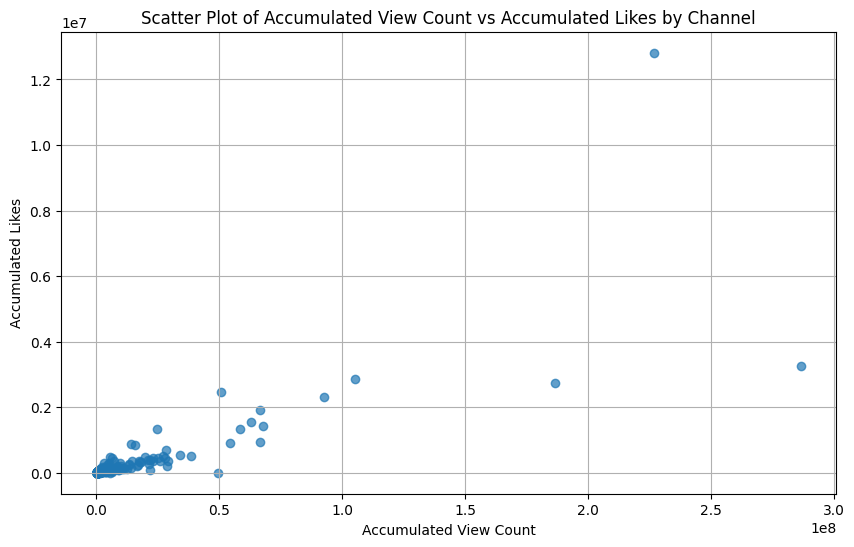

Correlation between 'view_count' and 'likes': 0.80


In [48]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(channel_stats['view_count'], channel_stats['likes'], alpha=0.7)
plt.title('Scatter Plot of Accumulated View Count vs Accumulated Likes by Channel')
plt.xlabel('Accumulated View Count')
plt.ylabel('Accumulated Likes')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = channel_stats['view_count'].corr(channel_stats['likes'])
print(f"Correlation between 'view_count' and 'likes': {correlation:.2f}")

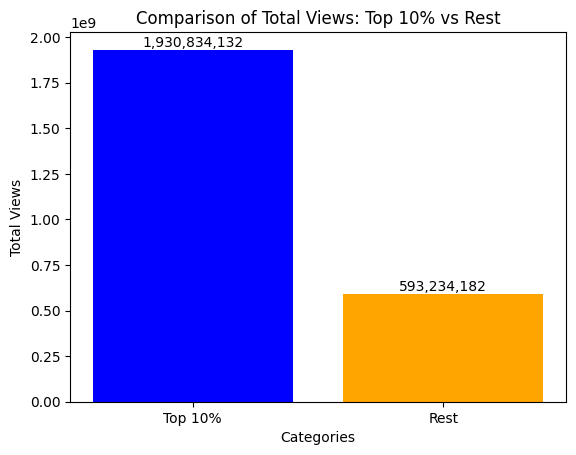

In [49]:
# Calculate the total views for each channel
channel_stats['total_views'] = channel_stats['view_count'] + channel_stats['dislikes'] + channel_stats['likes']

# Calculate the top 10 percent threshold
top_10_percent_threshold = channel_stats['total_views'].quantile(0.9)

# Create a column indicating whether each channel is in the top 10 percent
channel_stats['top_10_percent'] = channel_stats['total_views'] >= top_10_percent_threshold

# Calculate the total views for the top 10 percent channels
total_views_top_10_percent = channel_stats[channel_stats['top_10_percent']]['total_views'].sum()

# Calculate the total views for the rest of the channels
total_views_rest = channel_stats[~channel_stats['top_10_percent']]['total_views'].sum()

# Create a bar chart to compare total views
labels = ['Top 10%', 'Rest']
total_views = [total_views_top_10_percent, total_views_rest]

fig, ax = plt.subplots()

bars = ax.bar(labels, total_views, color=['blue', 'orange'])

# Annotate the bars with the total views
for bar, total_views in zip(bars, total_views):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{total_views:,}', ha='center', va='bottom')

plt.title('Comparison of Total Views: Top 10% vs Rest')
plt.xlabel('Categories')
plt.ylabel('Total Views')
plt.show()

# Drop the temporary columns
channel_stats.drop(['total_views', 'top_10_percent'], axis=1, inplace=True)

**Exploring Enabled/Disabled Comments on Videos**

Creating dfs for enabled and disabled videos

In [50]:
df = pd.read_csv(r'c:\YoutubeProject\US_youtube_trending_data.csv')

# Remove the 'thumbnail_link' column
df.drop('thumbnail_link', axis=1, inplace=True)

# Remove the 'video_id' column
df.drop('video_id', axis=1, inplace=True)

# Remove the 'channelId' column
df.drop('channelId', axis=1, inplace=True)

df = df[(df['dislikes'] != 0) | ((df['dislikes'] == 0) & (df['likes'] == 0))]

df = df[(df['view_count'] != 0)]

df= df[df['tags']!= '[none]']

df = df.drop_duplicates(subset='title')


In [51]:



df_comments_disabled= df[df['comments_disabled'] == True]

df_comments_enabled= df[df['comments_disabled'] == False]


df_comments_disabled=df_comments_disabled.drop(['tags','channelTitle','ratings_disabled','description','publishedAt','trending_date'], axis=1)

df_comments_enabled=df_comments_enabled.drop(['tags','channelTitle','ratings_disabled','description','publishedAt','trending_date'], axis=1)

df_comments_disabled


,title,categoryId,view_count,likes,dislikes,comment_count,comments_disabled
53,FIRST DAY IN THE NEW HOUSE! Ellie and Jared Mo...,22,208173,8810,215,0,True
131,AN UMBRELLA ACADEMY UNBOXING,24,1183833,127487,1588,0,True
134,LaBrant Family Baby Boy Name Reveal.,22,5849640,287811,5040,0,True
242,First Day of School GRWM + Vlog | College Edit...,26,260195,17234,213,0,True
816,IMPORTANT NEWS ABOUT ANNABELLE “ ESCAPING “,24,922298,33123,708,0,True
...,...,...,...,...,...,...,...
216809,FINAL FANTASY XIV: DAWNTRAIL Teaser Trailer,20,746517,0,0,0,True
219995,DRAGON BALL LEGENDS REVEALS ＆ STUFF #30,20,305999,0,0,0,True
222612,2023 DOKKAN NOW! SPECIAL (English),20,187732,0,0,0,True
223392,TVアニメ『呪術廻戦』第2期「渋谷事変」ノンクレジットOPムービー／OPテーマ：King G...,1,4128796,0,0,0,True


**10% Best Performing**

In [52]:

df_comments_disabled = df_comments_disabled.sort_values(by='view_count', ascending=False)

df_comments_disabled31 = df_comments_disabled.head(31)

In [53]:
#For best performing if comments are enabled

df_comments_enabled = df_comments_enabled.sort_values(by='view_count', ascending=False)

df_comments_enabled31 = df_comments_enabled.head(31)

df_comments_enabled31

,title,categoryId,view_count,likes,dislikes,comment_count,comments_disabled
80193,LISA - 'LALISA' M/V,10,85890366,5921316,38624,1958529,False
51,Cardi B - WAP feat. Megan Thee Stallion [Offic...,10,76805026,2820345,382578,270263,False
55605,BTS (방탄소년단) 'Butter' Official MV,10,67111752,7110071,8998,3400291,False
65398,MvRyhan Funny videos #tiktok #Shorts,24,59410897,1176893,39704,4850,False
1800,BTS (방탄소년단) 'Dynamite' Official MV,10,57229275,7045907,165420,2314087,False
3200,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,10,51234434,5912778,405329,1847794,False
66791,Oddly Satisfying Video #Shorts,22,50740092,1671219,56972,4143,False
86622,My hidden talent #shorts,23,49423130,1592335,27861,3163,False
17656,Live 2020 Election Results: Joe Biden beats Do...,25,46246802,143197,48953,288,False
54804,Money Plinko Challenge! 💰 #shorts,20,43969654,1329657,42170,2756,False


In [54]:
#Enabled
e_correlation_ViewLike = df_comments_enabled31['likes'].corr(df_comments_enabled31['view_count'])
e_correlation_ViewDislike = df_comments_enabled31['dislikes'].corr(df_comments_enabled31['view_count'])
e_correlation_LikesDislike = df_comments_enabled31['likes'].corr(df_comments_enabled31['dislikes'])

#Disabled
d_correlation_ViewLike = df_comments_disabled31['likes'].corr(df_comments_disabled31['view_count'])
d_correlation_ViewDislike = df_comments_disabled31['dislikes'].corr(df_comments_disabled31['view_count'])
d_correlation_LikesDislike = df_comments_disabled31['likes'].corr(df_comments_disabled31['dislikes'])

# Display the correlations
print('For Comments Enabled')
print(f"Correlation between 'likes' and 'view_count': {e_correlation_ViewLike:.2f}")
print(f"Correlation between 'dislikes' and 'view_count': {e_correlation_ViewDislike:.2f}")
print(f"Correlation between 'likes' and 'dislikes': {e_correlation_LikesDislike:.2f}")

print('\nFor Comments Disabled')
print(f"Correlation between 'likes' and 'view_count': {d_correlation_ViewLike:.2f}")
print(f"Correlation between 'dislikes' and 'view_count': {d_correlation_ViewDislike:.2f}")
print(f"Correlation between 'likes' and 'dislikes': {d_correlation_LikesDislike:.2f}")

For Comments Enabled
Correlation between 'likes' and 'view_count': 0.36
Correlation between 'dislikes' and 'view_count': 0.44
Correlation between 'likes' and 'dislikes': 0.25

For Comments Disabled
Correlation between 'likes' and 'view_count': 0.18
Correlation between 'dislikes' and 'view_count': 0.08
Correlation between 'likes' and 'dislikes': 0.64


In [55]:
viewsTotalDisabled = df_comments_disabled31['view_count'].sum()
viewsTotalEnabled = df_comments_enabled31['view_count'].sum()

likesTotalDisabled = df_comments_disabled31['likes'].sum()
likesTotalEnabled = df_comments_enabled31['likes'].sum()

dislikesTotalDisabled = df_comments_disabled31['dislikes'].sum()
dilikesTotalEnabled = df_comments_enabled31['dislikes'].sum()

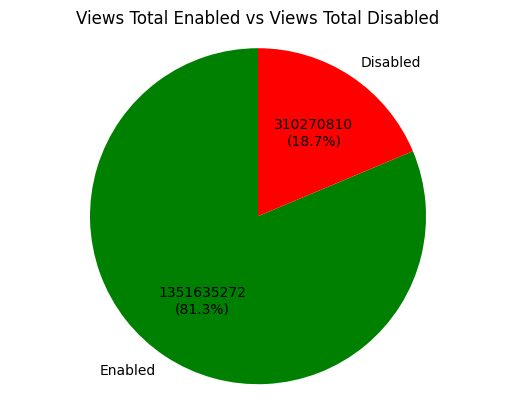

In [56]:
viewsTotalEnabled = viewsTotalEnabled
viewsTotalDisabled = viewsTotalDisabled

# Data
labels = ['Enabled', 'Disabled']
values = [viewsTotalEnabled, viewsTotalDisabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Views Total Enabled vs Views Total Disabled')

# Display the pie chart
plt.show()

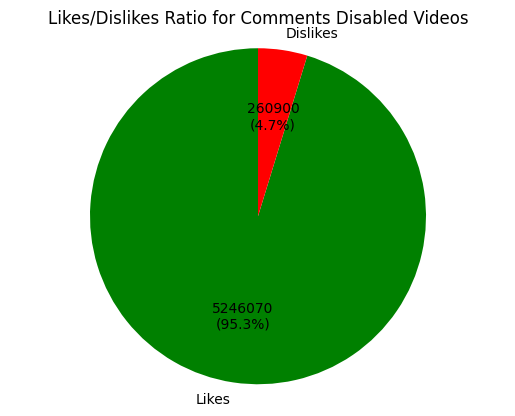

In [57]:
likesTotalDisabled = likesTotalDisabled
dislikesTotalDisabled = dislikesTotalDisabled

# Data
labels = ['Likes', 'Dislikes']
values = [likesTotalDisabled, dislikesTotalDisabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Likes/Dislikes Ratio for Comments Disabled Videos')

# Display the pie chart
plt.show()

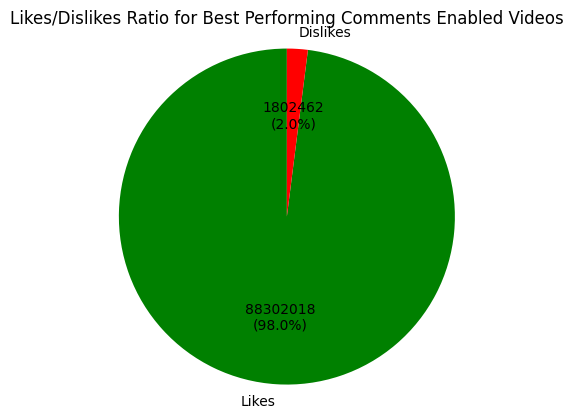

In [58]:
likesTotalEnabled = likesTotalEnabled
dilikesTotalEnabled = dilikesTotalEnabled

# Data
labels = ['Likes', 'Dislikes']
values = [likesTotalEnabled, dilikesTotalEnabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Likes/Dislikes Ratio for Best Performing Comments Enabled Videos')

# Display the pie chart
plt.show()

**10% Worst Performing**

In [59]:
df_comments_disabled31 = df_comments_disabled.tail(31)
df_comments_enabled31 = df_comments_enabled.tail(31)

In [60]:
#Enabled
e_correlation_ViewLike = df_comments_enabled31['likes'].corr(df_comments_enabled31['view_count'])
e_correlation_ViewDislike = df_comments_enabled31['dislikes'].corr(df_comments_enabled31['view_count'])
e_correlation_LikesDislike = df_comments_enabled31['likes'].corr(df_comments_enabled31['dislikes'])

#Disabled
d_correlation_ViewLike = df_comments_disabled31['likes'].corr(df_comments_disabled31['view_count'])
d_correlation_ViewDislike = df_comments_disabled31['dislikes'].corr(df_comments_disabled31['view_count'])
d_correlation_LikesDislike = df_comments_disabled31['likes'].corr(df_comments_disabled31['dislikes'])

# Display the correlations
print('For Comments Enabled')
print(f"Correlation between 'likes' and 'view_count': {e_correlation_ViewLike:.2f}")
print(f"Correlation between 'dislikes' and 'view_count': {e_correlation_ViewDislike:.2f}")
print(f"Correlation between 'likes' and 'dislikes': {e_correlation_LikesDislike:.2f}")

print('\nFor Comments Disabled')
print(f"Correlation between 'likes' and 'view_count': {d_correlation_ViewLike:.2f}")
print(f"Correlation between 'dislikes' and 'view_count': {d_correlation_ViewDislike:.2f}")
print(f"Correlation between 'likes' and 'dislikes': {d_correlation_LikesDislike:.2f}")

For Comments Enabled
Correlation between 'likes' and 'view_count': 0.22
Correlation between 'dislikes' and 'view_count': -0.06
Correlation between 'likes' and 'dislikes': 0.09

For Comments Disabled
Correlation between 'likes' and 'view_count': 0.40
Correlation between 'dislikes' and 'view_count': 0.26
Correlation between 'likes' and 'dislikes': 0.09


In [61]:
viewsTotalDisabled = df_comments_disabled31['view_count'].sum()
viewsTotalEnabled = df_comments_enabled31['view_count'].sum()

likesTotalDisabled = df_comments_disabled31['likes'].sum()
likesTotalEnabled = df_comments_enabled31['likes'].sum()

dislikesTotalDisabled = df_comments_disabled31['dislikes'].sum()
dilikesTotalEnabled = df_comments_enabled31['dislikes'].sum()

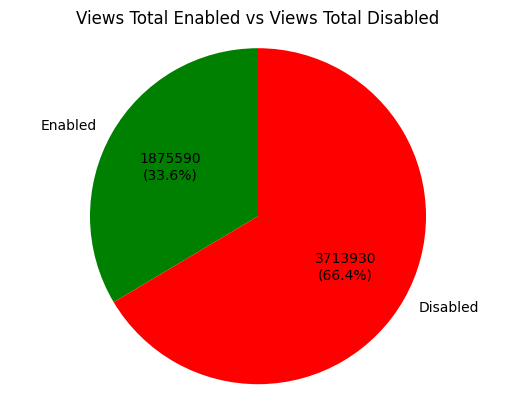

In [62]:
viewsTotalEnabled = viewsTotalEnabled
viewsTotalDisabled = viewsTotalDisabled

# Data
labels = ['Enabled', 'Disabled']
values = [viewsTotalEnabled, viewsTotalDisabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Views Total Enabled vs Views Total Disabled')

# Display the pie chart
plt.show()

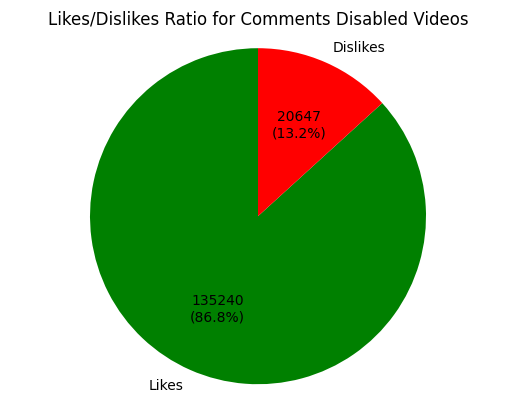

In [63]:
likesTotalDisabled = likesTotalDisabled
dislikesTotalDisabled = dislikesTotalDisabled

# Data
labels = ['Likes', 'Dislikes']
values = [likesTotalDisabled, dislikesTotalDisabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Likes/Dislikes Ratio for Comments Disabled Videos')

# Display the pie chart
plt.show()

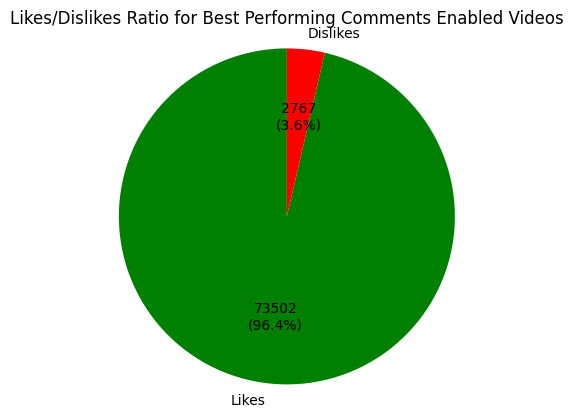

In [64]:
likesTotalEnabled = likesTotalEnabled
dilikesTotalEnabled = dilikesTotalEnabled

# Data
labels = ['Likes', 'Dislikes']
values = [likesTotalEnabled, dilikesTotalEnabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Likes/Dislikes Ratio for Best Performing Comments Enabled Videos')

# Display the pie chart
plt.show()

**Comparison Between All Disabled and Enabled Best Performing**

In [65]:
#For best performing if comments are enabled

df_comments_enabled = df_comments_enabled.sort_values(by='view_count', ascending=False)

df_comments_enabled = df_comments_enabled.head(317)

df_comments_enabled

,title,categoryId,view_count,likes,dislikes,comment_count,comments_disabled
80193,LISA - 'LALISA' M/V,10,85890366,5921316,38624,1958529,False
51,Cardi B - WAP feat. Megan Thee Stallion [Offic...,10,76805026,2820345,382578,270263,False
55605,BTS (방탄소년단) 'Butter' Official MV,10,67111752,7110071,8998,3400291,False
65398,MvRyhan Funny videos #tiktok #Shorts,24,59410897,1176893,39704,4850,False
1800,BTS (방탄소년단) 'Dynamite' Official MV,10,57229275,7045907,165420,2314087,False
...,...,...,...,...,...,...,...
46592,Marvel Studios' Loki | Official Trailer | Disney+,24,8211861,416249,4251,22896,False
83193,Brawl Stars: Brawl Talk - New Legendary Brawler!!,20,8202134,592891,7401,38969,False
74592,Sub Urban & Bella Poarch - INFERNO (Official M...,22,8149514,1033703,14122,87116,False
35193,The Weeknd’s FULL Pepsi Super Bowl LV Halftime...,17,8135977,470848,18621,55356,False


In [66]:
#Enabled
e_correlation_ViewLike = df_comments_enabled['likes'].corr(df_comments_enabled['view_count'])
e_correlation_ViewDislike = df_comments_enabled['dislikes'].corr(df_comments_enabled['view_count'])
e_correlation_LikesDislike = df_comments_enabled['likes'].corr(df_comments_enabled['dislikes'])

#Disabled
d_correlation_ViewLike = df_comments_disabled['likes'].corr(df_comments_disabled['view_count'])
d_correlation_ViewDislike = df_comments_disabled['dislikes'].corr(df_comments_disabled['view_count'])
d_correlation_LikesDislike = df_comments_disabled['likes'].corr(df_comments_disabled['dislikes'])

# Display the correlations
print('For Comments Enabled')
print(f"Correlation between 'likes' and 'view_count': {e_correlation_ViewLike:.2f}")
print(f"Correlation between 'dislikes' and 'view_count': {e_correlation_ViewDislike:.2f}")
print(f"Correlation between 'likes' and 'dislikes': {e_correlation_LikesDislike:.2f}")

print('\nFor Comments Disabled')
print(f"Correlation between 'likes' and 'view_count': {d_correlation_ViewLike:.2f}")
print(f"Correlation between 'dislikes' and 'view_count': {d_correlation_ViewDislike:.2f}")
print(f"Correlation between 'likes' and 'dislikes': {d_correlation_LikesDislike:.2f}")

For Comments Enabled
Correlation between 'likes' and 'view_count': 0.56
Correlation between 'dislikes' and 'view_count': 0.49
Correlation between 'likes' and 'dislikes': 0.36

For Comments Disabled
Correlation between 'likes' and 'view_count': 0.54
Correlation between 'dislikes' and 'view_count': 0.46
Correlation between 'likes' and 'dislikes': 0.70


In [67]:
viewsTotalDisabled = df_comments_disabled['view_count'].sum()
viewsTotalEnabled = df_comments_enabled['view_count'].sum()

likesTotalDisabled = df_comments_disabled['likes'].sum()
likesTotalEnabled = df_comments_enabled['likes'].sum()

dislikesTotalDisabled = df_comments_disabled['dislikes'].sum()
dilikesTotalEnabled = df_comments_enabled['dislikes'].sum()

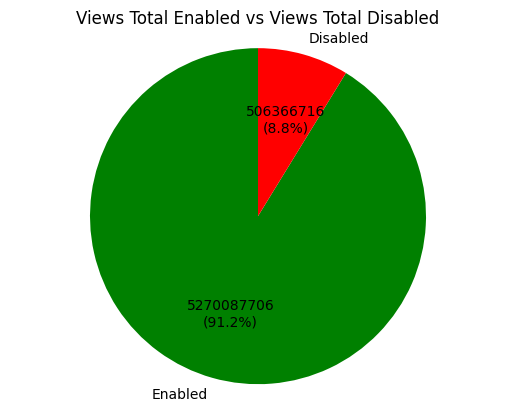

In [68]:
viewsTotalEnabled = viewsTotalEnabled
viewsTotalDisabled = viewsTotalDisabled

# Data
labels = ['Enabled', 'Disabled']
values = [viewsTotalEnabled, viewsTotalDisabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Views Total Enabled vs Views Total Disabled')

# Display the pie chart
plt.show()

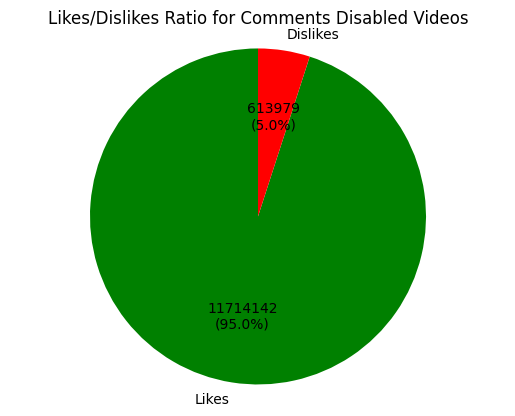

In [69]:
likesTotalDisabled = likesTotalDisabled
dislikesTotalDisabled = dislikesTotalDisabled

# Data
labels = ['Likes', 'Dislikes']
values = [likesTotalDisabled, dislikesTotalDisabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Likes/Dislikes Ratio for Comments Disabled Videos')

# Display the pie chart
plt.show()

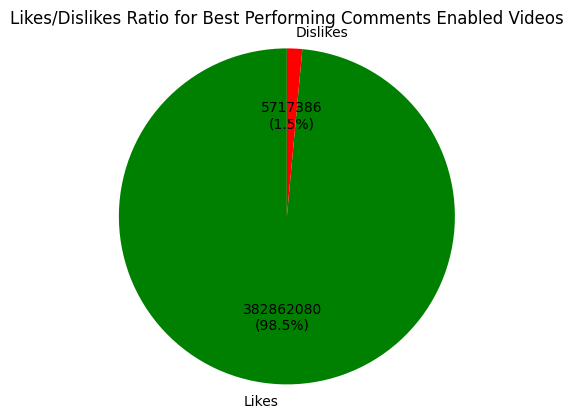

In [70]:
likesTotalEnabled = likesTotalEnabled
dilikesTotalEnabled = dilikesTotalEnabled

# Data
labels = ['Likes', 'Dislikes']
values = [likesTotalEnabled, dilikesTotalEnabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Likes/Dislikes Ratio for Best Performing Comments Enabled Videos')

# Display the pie chart
plt.show()

**Worst Performing**

In [71]:
##For worst performing comments enabled
df_comments_enabled= df[df['comments_disabled'] == False]

df_comments_enabled=df_comments_enabled.drop(['tags','channelTitle','ratings_disabled','description','publishedAt','trending_date'], axis=1)

df_comments_enabled = df_comments_enabled.sort_values(by='view_count', ascending=False)

df_comments_enabled = df_comments_enabled.tail(317)

df_comments_enabled

,title,categoryId,view_count,likes,dislikes,comment_count,comments_disabled
93628,"ZLaner BANNED From Halo Infinite, Battle Pass ...",20,125368,3053,186,940,False
45420,Did the 49ers Just Hold the Most Honest Press ...,17,125093,2716,71,483,False
43412,Quadeca - Sisyphus (Official Music Video),10,124963,22440,242,3432,False
6638,Answering your RTX 3080 questions! - Probing P...,28,124933,7209,133,668,False
19457,"Harden plus KD & Kyrie won't work, Schröder to...",17,124904,1361,67,399,False
...,...,...,...,...,...,...,...
59624,Mercedes AMG GT53 Cupholder Test #shorts,2,50335,4288,234,202,False
28421,NEVER Before Seen Video INSIDE The BENT Pyrami...,24,48325,7531,147,1700,False
1152,MMA Pros React to Chito Vera TKO Sean O'Malley...,17,47709,393,47,618,False
1095,"Opry Livestream - Luke Bryan, Darius Rucker, &...",10,44693,727,8,28,False


In [72]:
viewsTotalEnabled = df_comments_enabled['view_count'].sum()
likesTotalEnabled = df_comments_enabled['likes'].sum()
dilikesTotalEnabled = df_comments_enabled['dislikes'].sum()

In [73]:
viewsTotalEnabled

32172480

In [74]:
print('For Comments Enabled')
print(f"Correlation between 'likes' and 'view_count': {e_correlation_ViewLike:.2f}")
print(f"Correlation between 'dislikes' and 'view_count': {e_correlation_ViewDislike:.2f}")
print(f"Correlation between 'likes' and 'dislikes': {e_correlation_LikesDislike:.2f}")


For Comments Enabled
Correlation between 'likes' and 'view_count': 0.56
Correlation between 'dislikes' and 'view_count': 0.49
Correlation between 'likes' and 'dislikes': 0.36


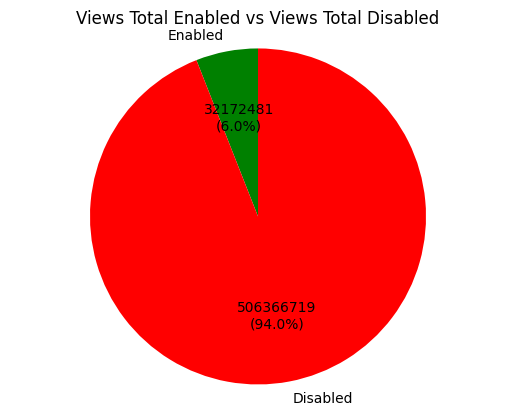

In [75]:
viewsTotalEnabled = viewsTotalEnabled
viewsTotalDisabled = viewsTotalDisabled

# Data
labels = ['Enabled', 'Disabled']
values = [viewsTotalEnabled, viewsTotalDisabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Views Total Enabled vs Views Total Disabled')

# Display the pie chart
plt.show()

Ratings Analysis

In [76]:
df_ratings_enabled= df[df['ratings_disabled'] == False]

df_ratings_disabled= df[df['ratings_disabled'] == True]


df_ratings_disabled=df_ratings_disabled.drop(['comments_disabled','description','publishedAt','trending_date'], axis=1)

df_ratings_enabled=df_ratings_enabled.drop(['comments_disabled','description','publishedAt','trending_date'], axis=1)

df_ratings_enabled

,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,ratings_disabled
0,I ASKED HER TO BE MY GIRLFRIEND...,Brawadis,22,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False
1,Apex Legends | Stories from the Outlands – “Th...,Apex Legends,20,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False
2,I left youtube for a month and THIS is what ha...,jacksepticeye,24,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,False
3,XXL 2020 Freshman Class Revealed - Official An...,XXL,10,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,False
4,Ultimate DIY Home Movie Theater for The LaBran...,Mr. Kate,26,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,False
...,...,...,...,...,...,...,...,...,...
98457,END OF VAN LIFE AFRICA,Eamon & Bec,19,van life|living in a van|vanlife|eamon and bec...,345014,21361,198,1967,False
98462,3 FOODS to TRY before you DIE: Irish Edition #...,Jorden Tually,19,jorden tually,183570,8684,429,175,False
98465,Vanilla Extract,Nick DiGiovanni,22,[None],634395,72470,663,645,False
98467,So I Wrote A Kids Book..📚,Peet Montzingo,22,peet montzingo|monzingo|mozingo|pete|mom|tikto...,1221491,96057,1827,802,False


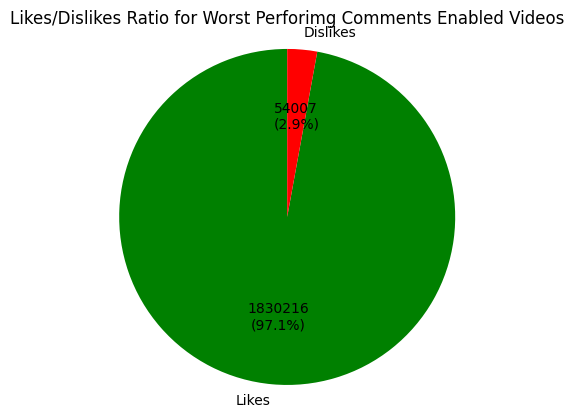

In [77]:
likesTotalEnabled = likesTotalEnabled
dilikesTotalEnabled = dilikesTotalEnabled

# Data
labels = ['Likes', 'Dislikes']
values = [likesTotalEnabled, dilikesTotalEnabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Likes/Dislikes Ratio for Worst Perforimg Comments Enabled Videos')

# Display the pie chart
plt.show()

**Ratings Analysis**

In [78]:
viewsTotalRateDisabled = df_ratings_disabled['view_count'].sum()
viewsTotalRateEnabled = df_ratings_enabled['view_count'].sum()

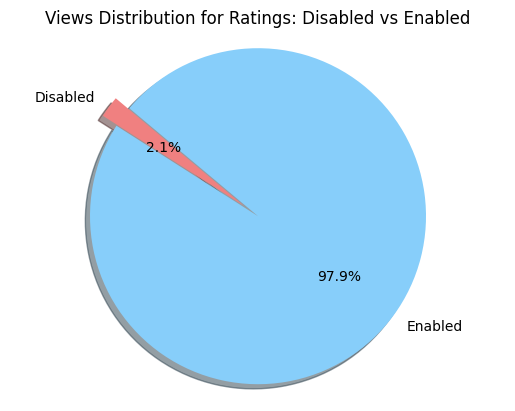

In [79]:
viewsTotalDisabled = 500
viewsTotalEnabled = 1000


labels = 'Disabled', 'Enabled'
sizes = [viewsTotalRateDisabled, viewsTotalRateEnabled]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title('Views Distribution for Ratings: Disabled vs Enabled')
plt.show()

In [80]:
df

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare..."
2,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,False,False,I left youtube for a month and this is what ha...
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,False,False,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225226,BRASIL vs. BOLIVIA [5-1] | RESUMEN | ELIMINATO...,2023-09-09T04:55:46Z,CONMEBOL,17,2023-09-11T00:00:00Z,fútbol|pelota|gol|copa|libertadores|sudamerica...,5135705,0,0,5095,False,True,"Espetáculo brasileiro! 🤩🔥Com 2️⃣ de Neymar, a ..."
225609,BOLIVIA vs. ARGENTINA [0-3] | RESUMEN | ELIMIN...,2023-09-13T00:12:29Z,CONMEBOL,17,2023-09-13T00:00:00Z,fútbol|pelota|gol|copa|libertadores|sudamerica...,2323121,0,0,2340,False,True,¡Goleada de #Argentina en La Paz! La Albiceles...
225988,Nintendo Direct 9.14.2023 - Nintendo Switch,2023-09-14T14:48:31Z,Nintendo of America,20,2023-09-15T00:00:00Z,nintendo|game|gameplay|fun|video game|action|a...,3415525,0,0,8186,False,True,Watch the latest Nintendo Direct livestream fe...
226043,[스우파2] 메가 크루 미션 대중 평가 l 잼 리퍼블릭(JAM REPUBLIC),2023-09-12T15:16:34Z,The CHOOM (더 춤),24,2023-09-15T00:00:00Z,[None],4035834,0,0,20800,False,True,[스우파2] 메가 크루 미션 대중 평가 l 잼 리퍼블릭(JAM REPUBLIC)지금...


In [81]:
df= df.sort_values(by='view_count', ascending=False)

df_10 = df.head(1533)

In [82]:
commentEN_ratingEN_df = df_10[(df_10['comments_disabled'] == False) & (df_10['ratings_disabled'] == False)]

commentEN_ratingDIS_df = df_10[(df_10['comments_disabled'] == False) & (df_10['ratings_disabled'] == True)]

commentDIS_ratingEN_df = df_10[(df_10['comments_disabled'] == True) & (df_10['ratings_disabled'] == False)]

commentDIS_ratingDIS_df = df_10[(df_10['comments_disabled'] == True) & (df_10['ratings_disabled'] == True)]

In [83]:
#Enabled Enabled
EE_correlation_ViewLike = commentEN_ratingEN_df['likes'].corr(commentEN_ratingEN_df['view_count'])
EE_correlation_ViewDislike = commentEN_ratingEN_df['dislikes'].corr(commentEN_ratingEN_df['view_count'])
EE_correlation_LikesDislike = commentEN_ratingEN_df['likes'].corr(commentEN_ratingEN_df['dislikes'])

#Enabled Disabled
ED_correlation_ViewLike = commentEN_ratingDIS_df['likes'].corr(commentEN_ratingDIS_df['view_count'])
ED_correlation_ViewDislike = commentEN_ratingDIS_df['dislikes'].corr(commentEN_ratingDIS_df['view_count'])
ED_correlation_LikesDislike = commentEN_ratingDIS_df['likes'].corr(commentEN_ratingDIS_df['dislikes'])

#Disabled Enabled
DE_correlation_ViewLike = commentDIS_ratingEN_df['likes'].corr(commentDIS_ratingEN_df['view_count'])
DE_correlation_ViewDislike = commentDIS_ratingEN_df['dislikes'].corr(commentDIS_ratingEN_df['view_count'])
DE_correlation_LikesDislike = commentDIS_ratingEN_df['likes'].corr(commentDIS_ratingEN_df['dislikes'])

#Disabled Disabled
DD_correlation_ViewLike = commentDIS_ratingDIS_df['likes'].corr(commentDIS_ratingDIS_df['view_count'])
DD_correlation_ViewDislike = commentDIS_ratingDIS_df['dislikes'].corr(commentDIS_ratingDIS_df['view_count'])
DD_correlation_LikesDislike = commentDIS_ratingDIS_df['likes'].corr(commentDIS_ratingDIS_df['dislikes'])

# Display the correlations
print('For Enabled Enabled')
print(f"Correlation between 'likes' and 'view_count': {EE_correlation_ViewLike:.2f}")
print(f"Correlation between 'dislikes' and 'view_count': {EE_correlation_ViewDislike:.2f}")
print(f"Correlation between 'likes' and 'dislikes': {EE_correlation_LikesDislike:.2f}")

print('\nDisabled Enabled')
print(f"Correlation between 'likes' and 'view_count': {ED_correlation_ViewLike:.2f}")
print(f"Correlation between 'dislikes' and 'view_count': {ED_correlation_LikesDislike:.2f}")
print(f"Correlation between 'likes' and 'dislikes': {ED_correlation_LikesDislike:.2f}")

print('\nEnabled Disabled')
print(f"Correlation between 'likes' and 'view_count': {ED_correlation_ViewLike:.2f}")
print(f"Correlation between 'dislikes' and 'view_count': {ED_correlation_ViewLike:.2f}")
print(f"Correlation between 'likes' and 'dislikes': {ED_correlation_ViewLike:.2f}")

print('\nDisabled Disabled')
print(f"Correlation between 'likes' and 'view_count': {DD_correlation_ViewLike:.2f}")
print(f"Correlation between 'dislikes' and 'view_count': {DD_correlation_ViewDislike:.2f}")
print(f"Correlation between 'likes' and 'dislikes': {DD_correlation_LikesDislike:.2f}")

For Enabled Enabled
Correlation between 'likes' and 'view_count': 0.69
Correlation between 'dislikes' and 'view_count': 0.55
Correlation between 'likes' and 'dislikes': 0.43

Disabled Enabled
Correlation between 'likes' and 'view_count': nan
Correlation between 'dislikes' and 'view_count': nan
Correlation between 'likes' and 'dislikes': nan

Enabled Disabled
Correlation between 'likes' and 'view_count': nan
Correlation between 'dislikes' and 'view_count': nan
Correlation between 'likes' and 'dislikes': nan

Disabled Disabled
Correlation between 'likes' and 'view_count': nan
Correlation between 'dislikes' and 'view_count': nan
Correlation between 'likes' and 'dislikes': nan


c:\Users\Sherow\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Sherow\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [84]:
commentEN_ratingEN = commentEN_ratingEN_df['view_count'].sum()

commentEN_ratingDIS = commentEN_ratingDIS_df['view_count'].sum()

commentDIS_ratingEN = commentDIS_ratingEN_df['view_count'].sum()

commentDIS_ratingDIS = commentDIS_ratingDIS_df['view_count'].sum()

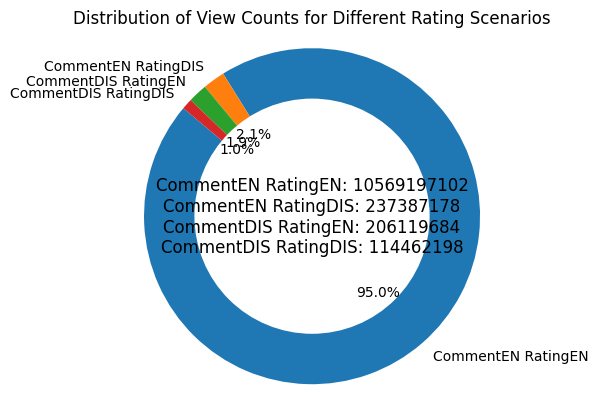

In [85]:
values = [commentEN_ratingEN, commentEN_ratingDIS, commentDIS_ratingEN, commentDIS_ratingDIS]
labels = ['CommentEN RatingEN', 'CommentEN RatingDIS', 'CommentDIS RatingEN', 'CommentDIS RatingDIS']

# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Draw a circle at the center to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')  

# Adding a title
plt.title('Distribution of View Counts for Different Rating Scenarios')

# Display the actual values in the center
plt.text(0, 0, '\n'.join([f'{label}: {value}' for label, value in zip(labels, values)]), 
         horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')

# Display the chart
plt.show()

In [86]:
commentEN_ratingEN = commentEN_ratingEN_df['likes'].sum()

commentEN_ratingDIS = commentEN_ratingDIS_df['likes'].sum()

commentDIS_ratingEN = commentDIS_ratingEN_df['likes'].sum()

commentDIS_ratingDIS = commentDIS_ratingDIS_df['likes'].sum()

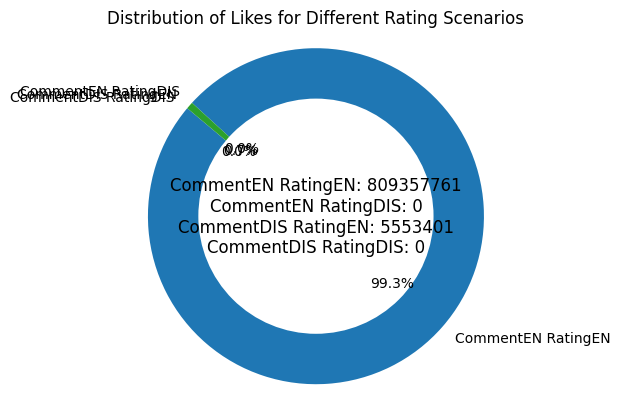

In [87]:
values = [commentEN_ratingEN, commentEN_ratingDIS, commentDIS_ratingEN, commentDIS_ratingDIS]
labels = ['CommentEN RatingEN', 'CommentEN RatingDIS', 'CommentDIS RatingEN', 'CommentDIS RatingDIS']

# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Draw a circle at the center to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')  

# Adding a title
plt.title('Distribution of Likes for Different Rating Scenarios')

# Display the actual values in the center
plt.text(0, 0, '\n'.join([f'{label}: {value}' for label, value in zip(labels, values)]), 
         horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')

# Display the chart
plt.show()

In [88]:
commentEN_ratingEN = commentEN_ratingEN_df['dislikes'].sum()

commentEN_ratingDIS = commentEN_ratingDIS_df['dislikes'].sum()

commentDIS_ratingEN = commentDIS_ratingEN_df['dislikes'].sum()

commentDIS_ratingDIS = commentDIS_ratingDIS_df['dislikes'].sum()

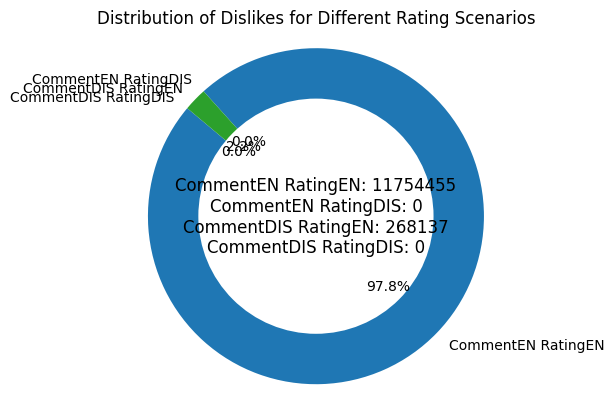

In [89]:
values = [commentEN_ratingEN, commentEN_ratingDIS, commentDIS_ratingEN, commentDIS_ratingDIS]
labels = ['CommentEN RatingEN', 'CommentEN RatingDIS', 'CommentDIS RatingEN', 'CommentDIS RatingDIS']

# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Draw a circle at the center to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')  

# Adding a title
plt.title('Distribution of Dislikes for Different Rating Scenarios')

# Display the actual values in the center
plt.text(0, 0, '\n'.join([f'{label}: {value}' for label, value in zip(labels, values)]), 
         horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')

# Display the chart
plt.show()

In [90]:
disabled_count = df[df['comments_disabled'] == True].count()
enabled_count = df[df['comments_disabled'] == False].count()


print(f"Disabled Count: {disabled_count['title']}")
print(f"Enabled Count: {enabled_count['title']}")

Disabled Count: 317
Enabled Count: 17820


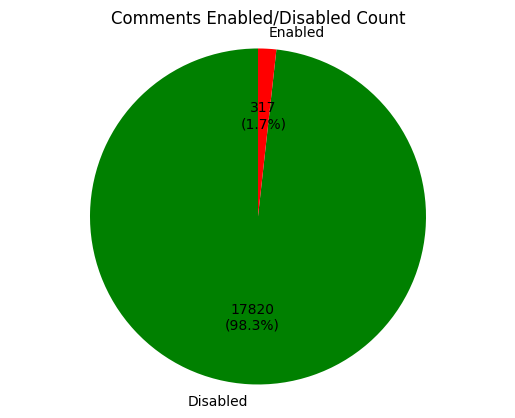

In [91]:
# Assuming disabled_count and enabled_count are DataFrame counts
disabled_count = df[df['comments_disabled'] == True].count()['title']
enabled_count = df[df['comments_disabled'] == False].count()['title']

# Data
labels = ['Disabled', 'Enabled']
values = [enabled_count, disabled_count]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Comments Enabled/Disabled Count')

# Display the pie chart
plt.show()

In [92]:
df

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
80193,LISA - 'LALISA' M/V,2021-09-10T04:00:13Z,BLACKPINK,10,2021-09-11T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,85890366,5921316,38624,1958529,False,False,LISA - LALISA내 뒷모습만 봐도 알잖아어두워질 때 분홍빛이나새하얀 조명이 ...
51,Cardi B - WAP feat. Megan Thee Stallion [Offic...,2020-08-07T04:00:10Z,Cardi B,10,2020-08-12T00:00:00Z,Cardi B|Cardi|Atlantic Records|rap|hip hop|tra...,76805026,2820345,382578,270263,False,False,Cardi B - WAP feat. Megan Thee StallionStream/...
55605,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,HYBE LABELS,10,2021-05-21T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,67111752,7110071,8998,3400291,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
65398,MvRyhan Funny videos #tiktok #Shorts,2021-06-25T07:37:36Z,Mv Ryhan,24,2021-06-29T00:00:00Z,[None],59410897,1176893,39704,4850,False,False,#shorts
1800,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,10,2020-08-21T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,57229275,7045907,165420,2314087,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59624,Mercedes AMG GT53 Cupholder Test #shorts,2021-06-07T11:00:24Z,CarBuzz,2,2021-06-08T00:00:00Z,Mercedes|Mercedes AMG|AMG|Mercedes AMG GT53|AM...,50335,4288,234,202,False,False,"The $100,000 #mercedes #amg GT53 has some TERR..."
28421,NEVER Before Seen Video INSIDE The BENT Pyrami...,2021-01-05T02:16:41Z,Bright Insight,24,2021-01-05T00:00:00Z,[None],48325,7531,147,1700,False,False,INCREDIBLE! First ever video footage INSIDE th...
1152,MMA Pros React to Chito Vera TKO Sean O'Malley...,2020-08-16T04:22:26Z,MMA Crazy,17,2020-08-17T00:00:00Z,Cody Garbrandt|Henry Cejudo|Stephen Wonderboy ...,47709,393,47,618,False,False,MMA Pros React to Marlon Chito Vera TKO Sean O...
1095,"Opry Livestream - Luke Bryan, Darius Rucker, &...",2020-08-16T01:14:47Z,Circle All Access,10,2020-08-17T00:00:00Z,Luke Bryan|Darius Rucker|Bobby Bones|Opry|Circ...,44693,727,8,28,False,False,Come together for a night of fun and music wit...


In [93]:
# Open the JSON file containing category information
with open(r'c:\YoutubeProject\US_category_id.json') as f:
    category_dict = json.load(f)  # Store category names and their numerical IDs

# Replace numerical category IDs with their corresponding category names
df['categoryName'] = df['categoryId'].astype(str).replace(category_dict)

# Drop the 'categoryId' column to retain only the category names
df = df.drop('categoryId', axis=1)

df.head(2)

,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName
80193,LISA - 'LALISA' M/V,2021-09-10T04:00:13Z,BLACKPINK,2021-09-11T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,85890366,5921316,38624,1958529,False,False,LISA - LALISA내 뒷모습만 봐도 알잖아어두워질 때 분홍빛이나새하얀 조명이 ...,Music
51,Cardi B - WAP feat. Megan Thee Stallion [Offic...,2020-08-07T04:00:10Z,Cardi B,2020-08-12T00:00:00Z,Cardi B|Cardi|Atlantic Records|rap|hip hop|tra...,76805026,2820345,382578,270263,False,False,Cardi B - WAP feat. Megan Thee StallionStream/...,Music


In [94]:
df_grouped = df.groupby('categoryName')

# Create a dictionary to store DataFrames for each category
category_dataframes = {}

# Iterate through each group (category) and create a separate DataFrame
for category, group in df_grouped:
    category_dataframes[category] = group

In [95]:
genres = []
total_views = []
total_likes = []
total_dislikes = []

# Iterate through each DataFrame and calculate the totals
for category, df_category in category_dataframes.items():
    genres.append(category)
    total_views.append(df_category['view_count'].sum())
    total_likes.append(df_category['likes'].sum())
    total_dislikes.append(df_category['dislikes'].sum())

# Create a new DataFrame
combined_df = pd.DataFrame({'Genre': genres, 'TotalViews': total_views, 'TotalLikes': total_likes, 'TotalDislikes': total_dislikes})

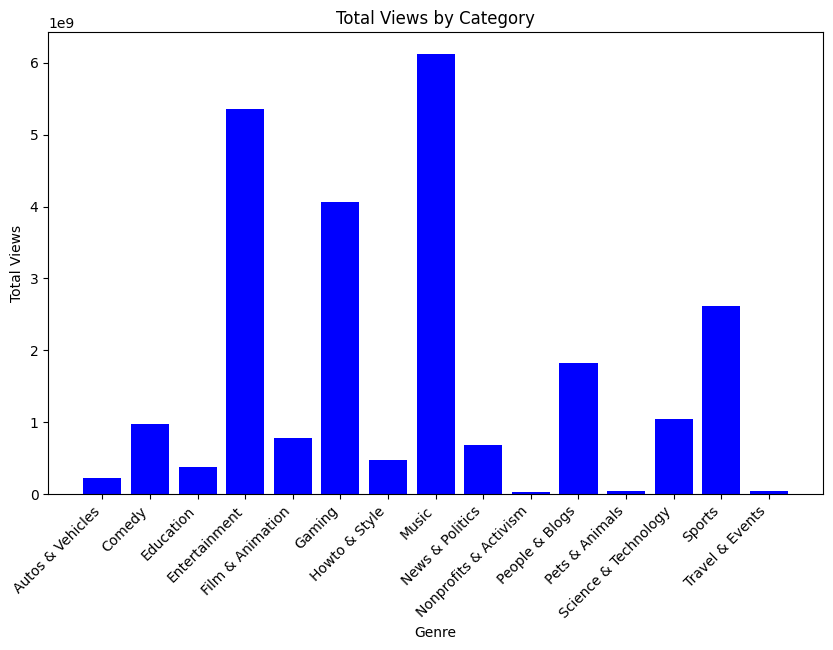

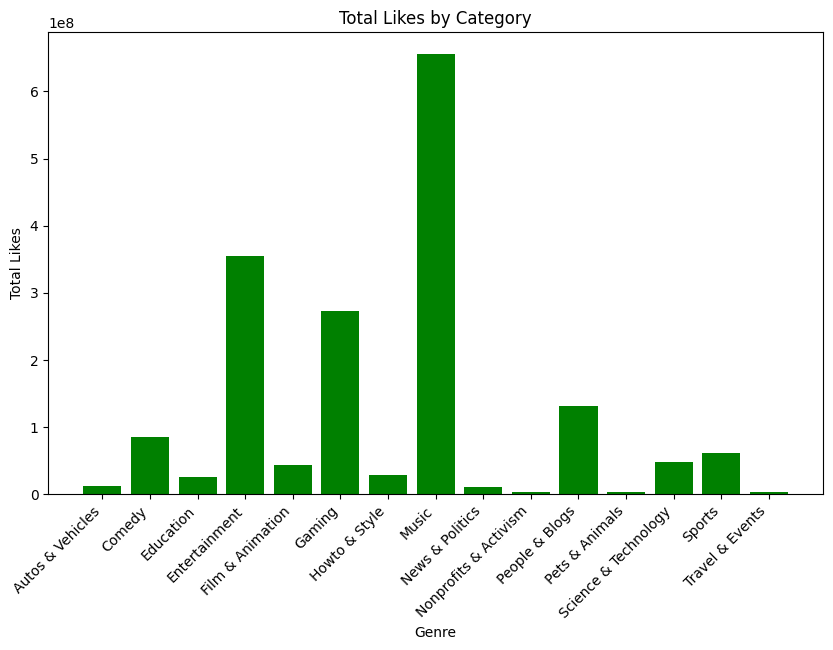

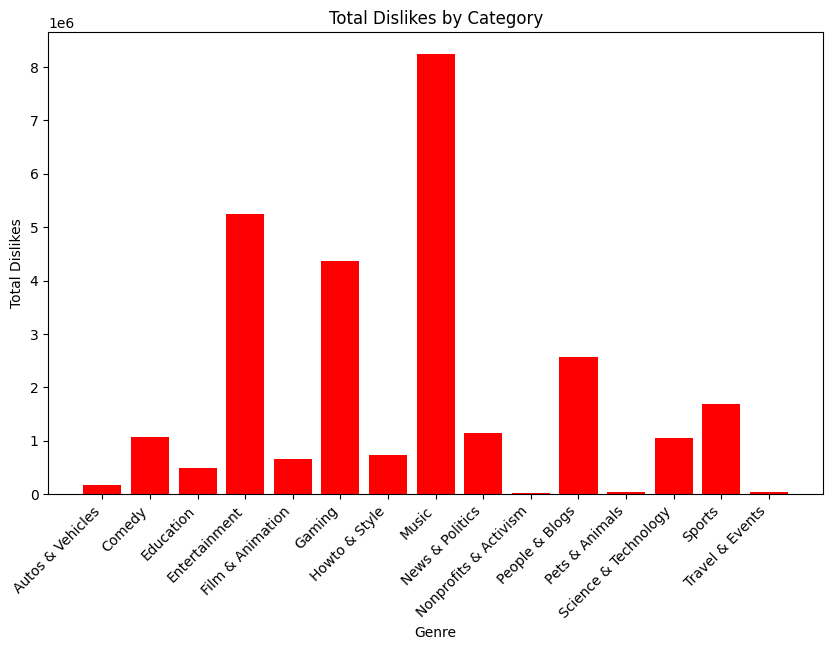

In [96]:
plt.figure(figsize=(10, 6))
plt.bar(combined_df['Genre'], combined_df['TotalViews'], color='blue')
plt.title('Total Views by Category')
plt.xlabel('Genre')
plt.ylabel('Total Views')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotting total likes
plt.figure(figsize=(10, 6))
plt.bar(combined_df['Genre'], combined_df['TotalLikes'], color='green')
plt.title('Total Likes by Category')
plt.xlabel('Genre')
plt.ylabel('Total Likes')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotting total dislikes
plt.figure(figsize=(10, 6))
plt.bar(combined_df['Genre'], combined_df['TotalDislikes'], color='red')
plt.title('Total Dislikes by Category')
plt.xlabel('Genre')
plt.ylabel('Total Dislikes')
plt.xticks(rotation=45, ha='right')
plt.show()

**Corelation Between likes,dislikes and comments between comments enabled videos**

In [97]:
# Defining a function for clean text
def clean_tag(tags):
    return [tag.lower().replace('"', '') for tag in tags.split('|')]

# Applying clean textf function for df
df['tags'] = df['tags'].apply(clean_tag)

df = df[df['tags'].apply(lambda x: '[none]' not in x)]

In [98]:
df = df.drop_duplicates(subset='title')

In [99]:


df = df[(df['dislikes'] != 0) | ((df['dislikes'] == 0) & (df['likes'] == 0))]

df = df[(df['view_count'] != 0)]

df= df[df['tags']!= '[none]']

In [100]:
# Function to clean and preprocess a title
def clean_title(title):
    # Convert to lowercase
    title = title.lower()
    
    # Remove special characters, numbers, and punctuation
    title = re.sub(r'[^a-zA-Z\s]', '', title)
    
    # Tokenize the title
    tokens = title.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Rejoin the cleaned tokens
    cleaned_title = ' '.join(tokens)
    
    return cleaned_title

# Apply the clean_title function to the 'title' column
df['cleaned_title'] = df['title'].apply(clean_title)
df.head(2)

,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName,cleaned_title
80193,LISA - 'LALISA' M/V,2021-09-10T04:00:13Z,BLACKPINK,2021-09-11T00:00:00Z,"[yg entertainment, yg, 와이지, k-pop, blackpink, ...",85890366,5921316,38624,1958529,False,False,LISA - LALISA내 뒷모습만 봐도 알잖아어두워질 때 분홍빛이나새하얀 조명이 ...,Music,lisa lalisa mv
51,Cardi B - WAP feat. Megan Thee Stallion [Offic...,2020-08-07T04:00:10Z,Cardi B,2020-08-12T00:00:00Z,"[cardi b, cardi, atlantic records, rap, hip ho...",76805026,2820345,382578,270263,False,False,Cardi B - WAP feat. Megan Thee StallionStream/...,Music,cardi b wap feat megan thee stallion official ...


In [101]:
# Flatten the list of lists in the 'tags' column into a single list of tags
all_tags = [tag for tags in df['tags'] for tag in tags]

# Count the frequency of each tag
tag_frequencies = Counter(all_tags)

# Create a DataFrame to store the tag names and their frequencies
tag_frequencies_df = pd.DataFrame(tag_frequencies.items(), columns=['Tag', 'Frequency'])

# Sort the DataFrame by frequency in descending order
tag_frequencies_df = tag_frequencies_df.sort_values(by='Frequency', ascending=False)

# Reset the index of the DataFrame
tag_frequencies_df = tag_frequencies_df.reset_index(drop=True)
tag_frequencies_df

,Tag,Frequency
0,funny,1199
1,comedy,792
2,minecraft,791
3,football,514
4,highlights,506
...,...,...
105968,impossible difficulty,1
105969,baby difficulty,1
105970,fundy difficulty,1
105971,so crazy,1


In [102]:
# Calculate the total number of unique tags
total_unique_tags = len(tag_frequencies_df)

# Calculate the top 10% threshold
top_10_percent_threshold = int(total_unique_tags * 0.10)

# Filter the tags to get the top 10% most frequent tags
top_10_percent_tags = tag_frequencies_df.head(top_10_percent_threshold)

# Remove tags with a frequency of 1
top_10_percent_tags = top_10_percent_tags[top_10_percent_tags['Frequency'] != 1]

# Reset the index of the DataFrame
top_10_percent_tags = top_10_percent_tags.reset_index(drop=True)
top_10_percent_tags

,Tag,Frequency
0,funny,1199
1,comedy,792
2,minecraft,791
3,football,514
4,highlights,506
...,...,...
10592,woman,5
10593,ew,5
10594,queen of da souf,5
10595,like you do,5


In [103]:
def count_top_tags(tags):
    count = 0
    for tag in tags:
        if tag in top_10_percent_tags['Tag'].values:
            count += 1
    return count
df['top_10_percent_count_tags'] = df['tags'].apply(count_top_tags)
df.head(2)

,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName,cleaned_title,top_10_percent_count_tags
80193,LISA - 'LALISA' M/V,2021-09-10T04:00:13Z,BLACKPINK,2021-09-11T00:00:00Z,"[yg entertainment, yg, 와이지, k-pop, blackpink, ...",85890366,5921316,38624,1958529,False,False,LISA - LALISA내 뒷모습만 봐도 알잖아어두워질 때 분홍빛이나새하얀 조명이 ...,Music,lisa lalisa mv,20
51,Cardi B - WAP feat. Megan Thee Stallion [Offic...,2020-08-07T04:00:10Z,Cardi B,2020-08-12T00:00:00Z,"[cardi b, cardi, atlantic records, rap, hip ho...",76805026,2820345,382578,270263,False,False,Cardi B - WAP feat. Megan Thee StallionStream/...,Music,cardi b wap feat megan thee stallion official ...,24


In [104]:
column_list = df['cleaned_title'].tolist()

column_list = [string.split() for string in column_list]

flat_list = [word for sublist in column_list for word in sublist]

word_counts = Counter(flat_list)

In [105]:
# Create a DataFrame to store the tag names and their frequencies
title_frequencies_df = pd.DataFrame(word_counts.items(), columns=['Title', 'Frequency'])

# Sort the DataFrame by frequency in descending order
title_frequencies_df = title_frequencies_df.sort_values(by='Frequency', ascending=False)

# Reset the index of the DataFrame
title_frequencies_df = title_frequencies_df.reset_index(drop=True)
title_frequencies_df

,Title,Frequency
0,official,2035
1,video,1799
2,vs,922
3,highlights,787
4,music,654
...,...,...
15428,ripley,1
15429,somalia,1
15430,donate,1
15431,ports,1


In [106]:
# Calculate the total number of unique tags
total_unique_title = len(title_frequencies_df)

# Calculate the top 10% threshold
top_10_percent = int(total_unique_title * 0.10)

# Filter the tags to get the top 10% most frequent tags
top_10_percent_titles = title_frequencies_df.head(top_10_percent)

# Remove tags with a frequency of 1
top_10_percent_titles = top_10_percent_titles[top_10_percent_titles['Frequency'] != 1]

# Reset the index of the DataFrame
top_10_percent_titles = top_10_percent_titles.reset_index(drop=True)
top_10_percent_titles

,Title,Frequency
0,official,2035
1,video,1799
2,vs,922
3,highlights,787
4,music,654
...,...,...
1538,fighters,12
1539,bay,12
1540,morray,12
1541,grammy,12


In [107]:
def count_top_words(title):
    count = 0
    words = title.split()
    for word in words:
        if word in top_10_percent_titles['Title'].values:
            count += 1
    return count

df['top_10_percent_count_title'] = df['cleaned_title'].apply(count_top_words)
df.head(4)

,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName,cleaned_title,top_10_percent_count_tags,top_10_percent_count_title
80193,LISA - 'LALISA' M/V,2021-09-10T04:00:13Z,BLACKPINK,2021-09-11T00:00:00Z,"[yg entertainment, yg, 와이지, k-pop, blackpink, ...",85890366,5921316,38624,1958529,False,False,LISA - LALISA내 뒷모습만 봐도 알잖아어두워질 때 분홍빛이나새하얀 조명이 ...,Music,lisa lalisa mv,20,2
51,Cardi B - WAP feat. Megan Thee Stallion [Offic...,2020-08-07T04:00:10Z,Cardi B,2020-08-12T00:00:00Z,"[cardi b, cardi, atlantic records, rap, hip ho...",76805026,2820345,382578,270263,False,False,Cardi B - WAP feat. Megan Thee StallionStream/...,Music,cardi b wap feat megan thee stallion official ...,24,9
55605,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,HYBE LABELS,2021-05-21T00:00:00Z,"[bighit, 빅히트, 방탄소년단, bts, bangtan, 방탄]",67111752,7110071,8998,3400291,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...,Music,bts butter official mv,6,4
1800,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,2020-08-21T00:00:00Z,"[bighit, 빅히트, 방탄소년단, bts, bangtan, 방탄]",57229275,7045907,165420,2314087,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,Music,bts dynamite official mv,6,4


In [108]:
df_comments_enabled= df[df['comments_disabled'] == False]




df_comments_enabled=df_comments_enabled.drop(['cleaned_title','categoryName','title','publishedAt','channelTitle','trending_date','tags','channelTitle','ratings_disabled','description','publishedAt','trending_date'], axis=1)

In [112]:
corr = df_comments_enabled.corr()

corr

,view_count,likes,dislikes,comment_count,comments_disabled,top_10_percent_count_tags,top_10_percent_count_title
view_count,1.000000,0.779049,0.581371,0.600531,NaN,0.079995,0.034690
likes,0.779049,1.000000,0.505020,0.730848,NaN,0.060737,-0.007781
dislikes,0.581371,0.505020,1.000000,0.409149,NaN,0.035414,0.027702
comment_count,0.600531,0.730848,0.409149,1.000000,NaN,0.017379,-0.006674
comments_disabled,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top_10_percent_count_tags,0.079995,0.060737,0.035414,0.017379,NaN,1.000000,0.142042
top_10_percent_count_title,0.034690,-0.007781,0.027702,-0.006674,NaN,0.142042,1.000000


there is no correlation